<a href="https://colab.research.google.com/github/Simon-PF2003/data-science-bike-prediction/blob/main/TPI_Ciencia_de_Datos_2025_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ANÁLISIS EXPLORATORIO DE LOS DATOS (EDA)**

In [ ]:
#importamos los paquetes necesarios
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from google.colab import drive
drive.mount('/content/drive')

#importamos el archivo csv de clientes
data_clientes = pd.read_csv("/content/drive/My Drive/Tps Ciencia de Datos/TPI/Base de datos/clientes.csv", sep=',', encoding='latin-1')
data_clientes = data_clientes.drop(columns=['IdCliente', 'Nombre', 'Apellido', 'FechaNacimiento', 'Email', 'Direccion', 'Telefono', 'IdCiudad', 'FechaPrimeraCompra'])
data_clientes.head()

Mounted at /content/drive


,EstadoCivil,Genero,IngresoAnual,TotalHijos,Educacion,Ocupacion,Propietario,CantAutomoviles,Distancia,Region,Edad,ComproBicicleta
0,C,M,60000.0,0,Licenciatura,Profesional,1,4,'10+ Km.',Sur,38,0
1,S,F,50000.0,2,Licenciatura,'Obrero especializado',1,0,'2-5 Km.',Norte,44,1
2,S,F,60000.0,1,'Estudios de postgrado','Obrero especializado',1,0,'1-2 Km.',Norte,41,0
3,S,F,30000.0,0,'Educaciï¿½n secundaria',Obrero,0,1,'2-5 Km.',Centro,42,1
4,S,F,10000.0,2,'Educaciï¿½n secundaria',Obrero,1,0,'0-1 Km.',Centro,42,1


#**Análisis univariante**

Estadísticas Básicas

In [ ]:
data_clientes.describe()

,IngresoAnual,TotalHijos,Propietario,CantAutomoviles,Edad,ComproBicicleta
count,6370.000000,6379.000000,6379.000000,6379.000000,6379.000000,6379.000000
mean,57532.182104,1.891676,0.676909,1.545383,51.164916,0.394733
std,32409.410694,1.628000,0.467694,1.146088,11.502781,0.488832
min,10000.000000,0.000000,0.000000,0.000000,32.000000,0.000000
25%,30000.000000,0.000000,0.000000,1.000000,42.000000,0.000000
50%,60000.000000,2.000000,1.000000,2.000000,49.000000,0.000000
75%,70000.000000,3.000000,1.000000,2.000000,59.000000,1.000000
max,170000.000000,5.000000,1.000000,4.000000,102.000000,1.000000


Matrices

In [ ]:
# Select only numeric columns before calculating the correlation
numeric_data_clientes = data_clientes.select_dtypes(include=np.number)
numeric_data_clientes = numeric_data_clientes.drop(columns=['Propietario'])
# no se ejecutan al mismo tiempo
# numeric_data_clientes.corr()
numeric_data_clientes.cov() # covarianza


,IngresoAnual,TotalHijos,CantAutomoviles,Edad,ComproBicicleta
IngresoAnual,1.050370e+09,11671.703081,17422.389602,57810.526508,886.569636
TotalHijos,1.167170e+04,2.650384,0.513462,9.253207,-0.103518
CantAutomoviles,1.742239e+04,0.513462,1.313517,2.243377,-0.099604
Edad,5.781053e+04,9.253207,2.243377,132.313971,-0.574986
ComproBicicleta,8.865696e+02,-0.103518,-0.099604,-0.574986,0.238956


Variables Numéricas

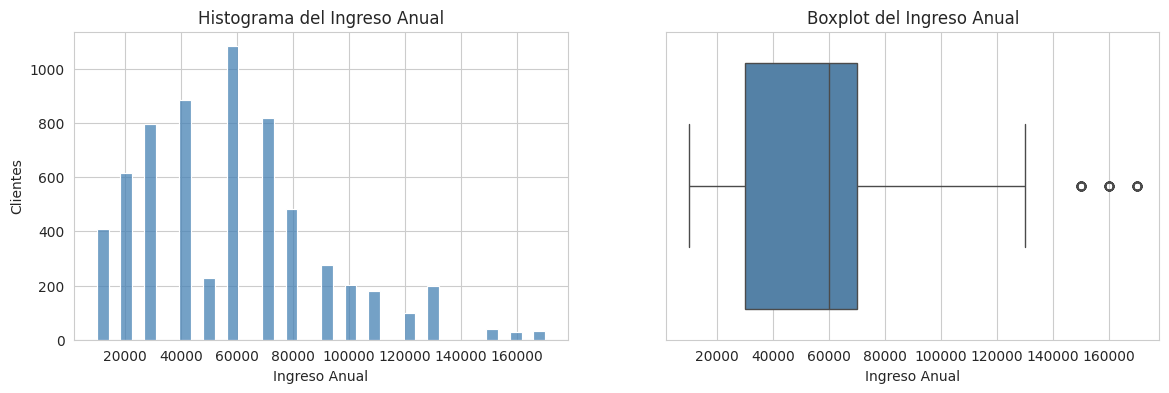

In [ ]:
sns.set_style("whitegrid")

# Crear una figura con dos subplots lado a lado (1 FILA 2 COLUMNAS)
fig,ax = plt.subplots(1, 2, figsize=(14, 4))

# Crear un HISTOGRAMA de la variable "Ingreso Anual" en el primer subplot
sns.histplot(data=data_clientes, x="IngresoAnual", ax=ax[0], color="steelblue")

# Agregar un título al primer subplot
ax[0].title.set_text("Histograma del Ingreso Anual")
ax[0].set_xlabel("Ingreso Anual")
ax[0].set_ylabel("Clientes")

# Crear un BOXPLOT de la variable "Ingreso Anual" en el segundo subplot
sns.boxplot(data=data_clientes, x="IngresoAnual", ax=ax[1], color="steelblue")

# Agregar un título al segundo subplot
ax[1].title.set_text("Boxplot del Ingreso Anual")
ax[1].set_xlabel("Ingreso Anual")

plt.show()

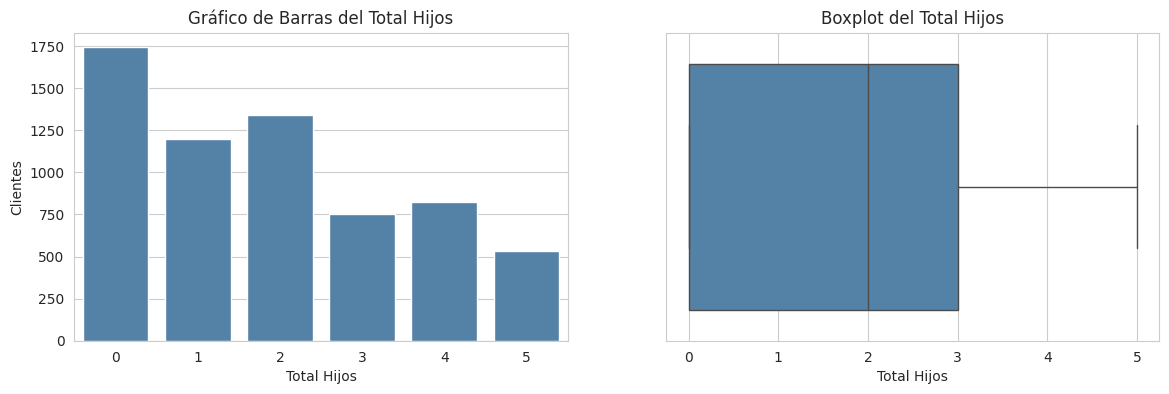

In [ ]:
sns.set_style("whitegrid")

# Crear una figura con dos subplots lado a lado (1 FILA 2 COLUMNAS)
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

# Crear un Gráfico de Barras de la variable "Total Hijos" en el primer subplot
sns.countplot(data=data_clientes, x="TotalHijos", ax=ax[0], color="steelblue")

# Agregar un título al primer subplot
ax[0].title.set_text("Gráfico de Barras del Total Hijos")
ax[0].set_xlabel("Total Hijos")
ax[0].set_ylabel("Clientes")

# Crear un BOXPLOT de la variable "Total Hijos" en el segundo subplot
sns.boxplot(data=data_clientes, x="TotalHijos", ax=ax[1], color="steelblue")

# Agregar un título al segundo subplot
ax[1].title.set_text("Boxplot del Total Hijos")
ax[1].set_xlabel("Total Hijos")

plt.show()

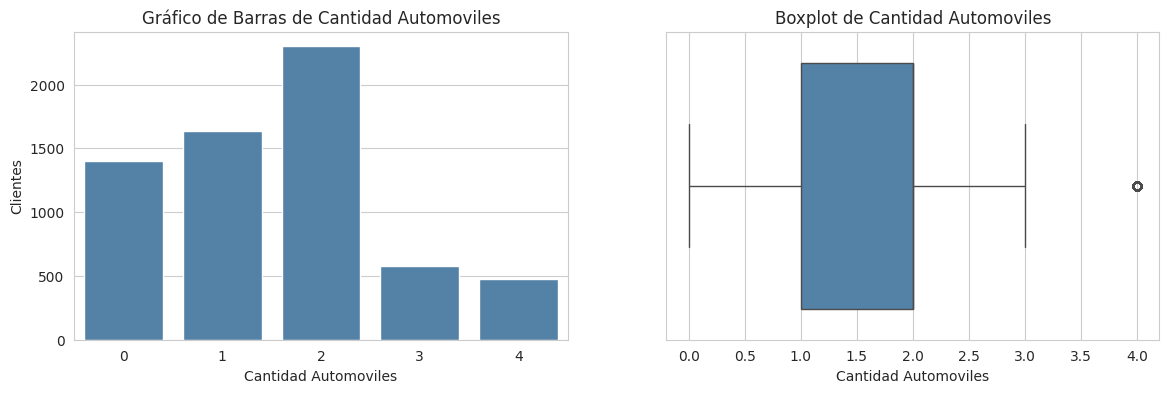

In [ ]:
sns.set_style("whitegrid")

# Crear una figura con dos subplots lado a lado (1 FILA 2 COLUMNAS)
fig,ax = plt.subplots(1, 2, figsize=(14, 4))

# Crear un Gráfico de Barras de la variable "Cantidad Automoviles" en el primer subplot
sns.countplot(data=data_clientes, x="CantAutomoviles", ax=ax[0], color="steelblue")

# Agregar un título al primer subplot
ax[0].title.set_text("Gráfico de Barras de Cantidad Automoviles")
ax[0].set_xlabel("Cantidad Automoviles")
ax[0].set_ylabel("Clientes")

# Crear un BOXPLOT de la variable "Cantidad Automoviles" en el segundo subplot
sns.boxplot(data=data_clientes, x="CantAutomoviles", ax=ax[1], color="steelblue")

# Agregar un título al segundo subplot
ax[1].title.set_text("Boxplot de Cantidad Automoviles")
ax[1].set_xlabel("Cantidad Automoviles")

plt.show()

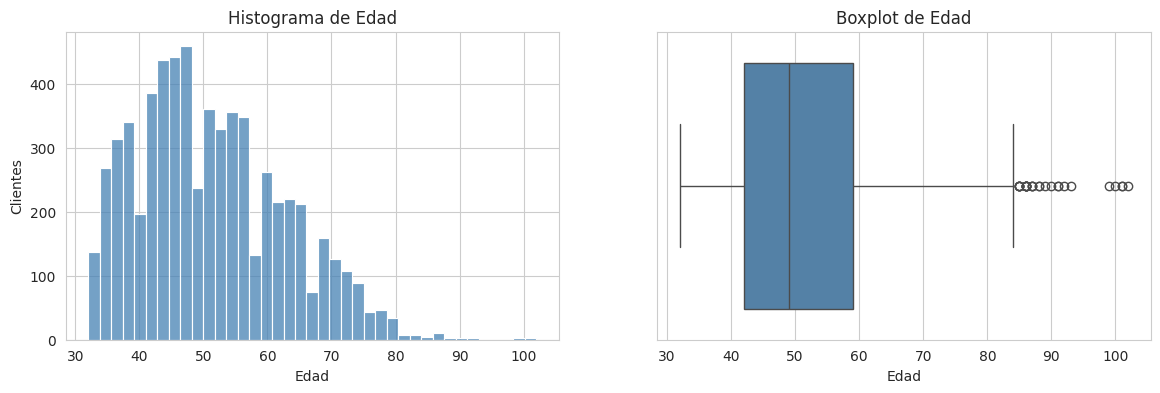

In [ ]:
sns.set_style("whitegrid")

# Crear una figura con dos subplots lado a lado (1 FILA 2 COLUMNAS)
fig,ax = plt.subplots(1, 2, figsize=(14, 4))

# Crear un HISTOGRAMA de la variable "Edad" en el primer subplot
sns.histplot(data=data_clientes, x="Edad", ax=ax[0], color="steelblue")

# Agregar un título al primer subplot
ax[0].title.set_text("Histograma de Edad")
ax[0].set_xlabel("Edad")
ax[0].set_ylabel("Clientes")

# Crear un BOXPLOT de la variable "Edad" en el segundo subplot
sns.boxplot(data=data_clientes, x="Edad", ax=ax[1], color="steelblue")

# Agregar un título al segundo subplot
ax[1].title.set_text("Boxplot de Edad")
ax[1].set_xlabel("Edad")

plt.show()

Variables Categóricas

/tmp/ipython-input-28-1799504396.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(etiquetas_corregidas, rotation=30, ha="right")


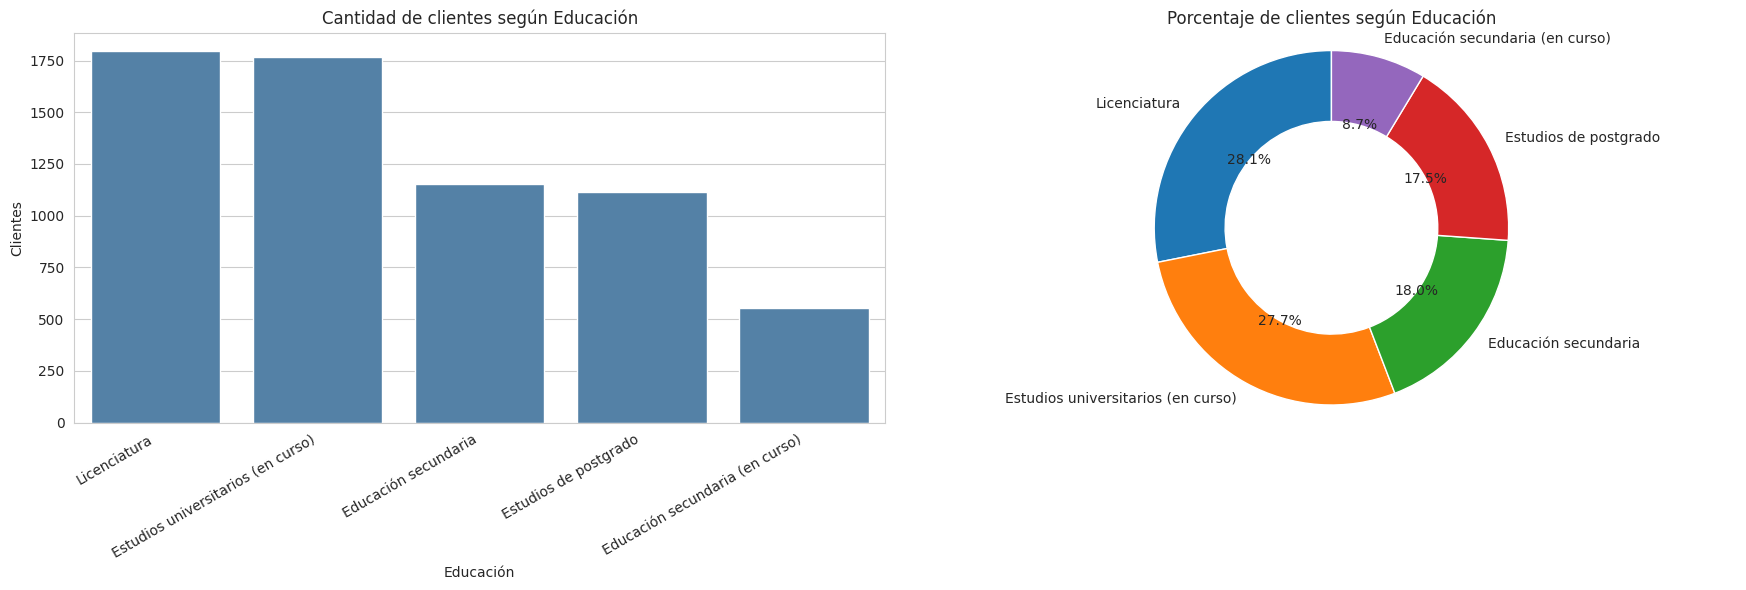

In [ ]:
sns.set_style("whitegrid")

# 1) Preparamos los conteos para el pie/dona
counts = data_clientes["Educacion"].value_counts()
# Nos aseguramos de mantener el mismo orden que en el barplot
orden = counts.index.tolist()

etiquetas_corregidas = [
    "Licenciatura",
    "Estudios universitarios (en curso)",
    "Educación secundaria",
    "Estudios de postgrado",
    "Educación secundaria (en curso)"
]

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# --- Subplot 1: Barplot ---
sns.countplot(
    x="Educacion",
    data=data_clientes,
    order=orden,
    color="steelblue",
    ax=axes[0]
)
axes[0].set_xlabel("Educación")
axes[0].set_ylabel("Clientes")
axes[0].set_title("Cantidad de clientes según Educación")
axes[0].set_xticklabels(etiquetas_corregidas, rotation=30, ha="right")

# --- Subplot 2: Dona ---
# Dibujamos un pie con wedgeprops para que sea dona
wedges, texts, autotexts = axes[1].pie(
    counts[orden],
    labels=etiquetas_corregidas,
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops=dict(width=0.4, edgecolor="w")
)
axes[1].set_title("Porcentaje de clientes según Educación")
axes[1].axis("equal")

plt.tight_layout()
plt.show()

/tmp/ipython-input-29-1610225915.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(etiquetas_ocup, rotation=30, ha="right")


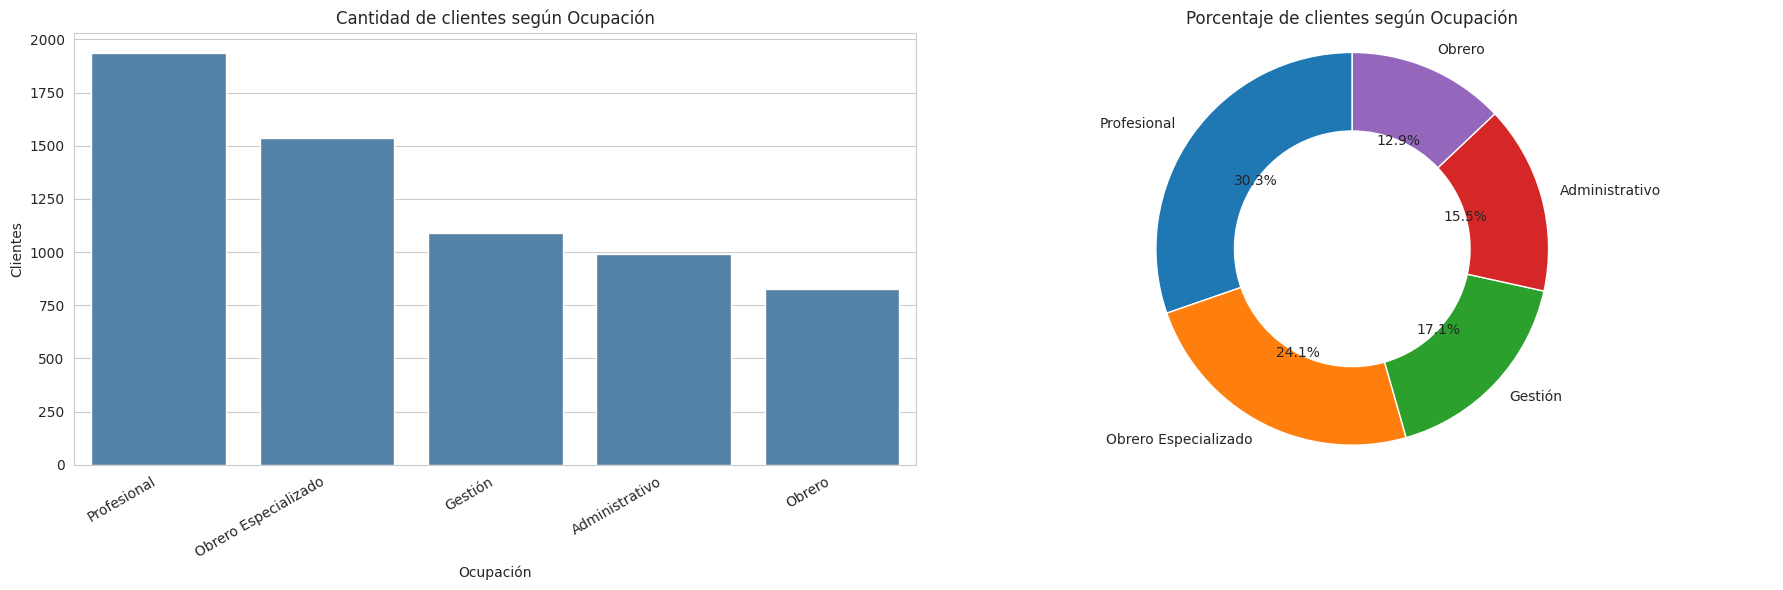

In [ ]:
sns.set_style("whitegrid")

counts_ocup = data_clientes["Ocupacion"].value_counts()
orden_ocup  = counts_ocup.index.tolist()

etiquetas_ocup = [
    "Profesional",
    "Obrero Especializado",
    "Gestión",
    "Administrativo",
    "Obrero"
]

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# --- Subplot 1: Barplot ---
sns.countplot(
    x="Ocupacion",
    data=data_clientes,
    order=orden_ocup,
    color="steelblue",
    ax=axes[0]
)
axes[0].set_xlabel("Ocupación")
axes[0].set_ylabel("Clientes")
axes[0].set_title("Cantidad de clientes según Ocupación")
axes[0].set_xticklabels(etiquetas_ocup, rotation=30, ha="right")

# --- Subplot 2: Dona ---
wedges, texts, autotexts = axes[1].pie(
    counts_ocup[orden_ocup],
    labels=etiquetas_ocup,
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops=dict(width=0.4, edgecolor="w")
)
axes[1].set_title("Porcentaje de clientes según Ocupación")
axes[1].axis("equal")

plt.tight_layout()
plt.show()

/tmp/ipython-input-30-4029012975.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(etiquetas_prop)


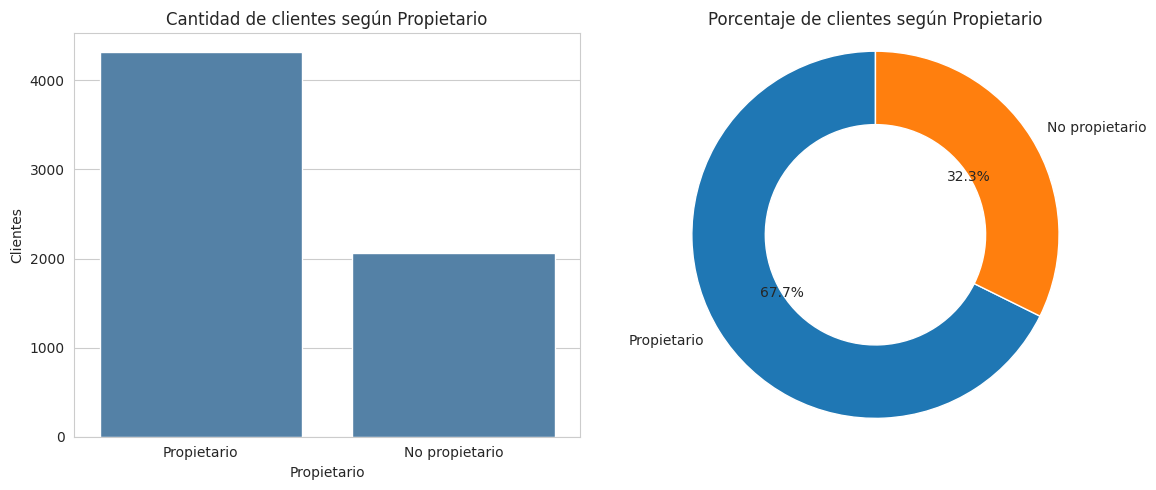

In [ ]:
sns.set_style("whitegrid")

counts_prop = data_clientes["Propietario"].value_counts()
orden_prop  = counts_prop.index.tolist()
etiquetas_prop = ["Propietario", "No propietario"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Subplot 1: Barplot
sns.countplot(
    x="Propietario",
    data=data_clientes,
    order=orden_prop,
    color="steelblue",
    ax=axes[0]
)
axes[0].set_xlabel("Propietario")
axes[0].set_ylabel("Clientes")
axes[0].set_title("Cantidad de clientes según Propietario")
axes[0].set_xticklabels(etiquetas_prop)

# Subplot 2: Dona
wedges, texts, autotexts = axes[1].pie(
    counts_prop[orden_prop],
    labels=etiquetas_prop,
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops=dict(width=0.4, edgecolor="w")
)
axes[1].set_title("Porcentaje de clientes según Propietario")
axes[1].axis("equal")

plt.tight_layout()
plt.show()

/tmp/ipython-input-31-1281810620.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(etiquetas_ec)


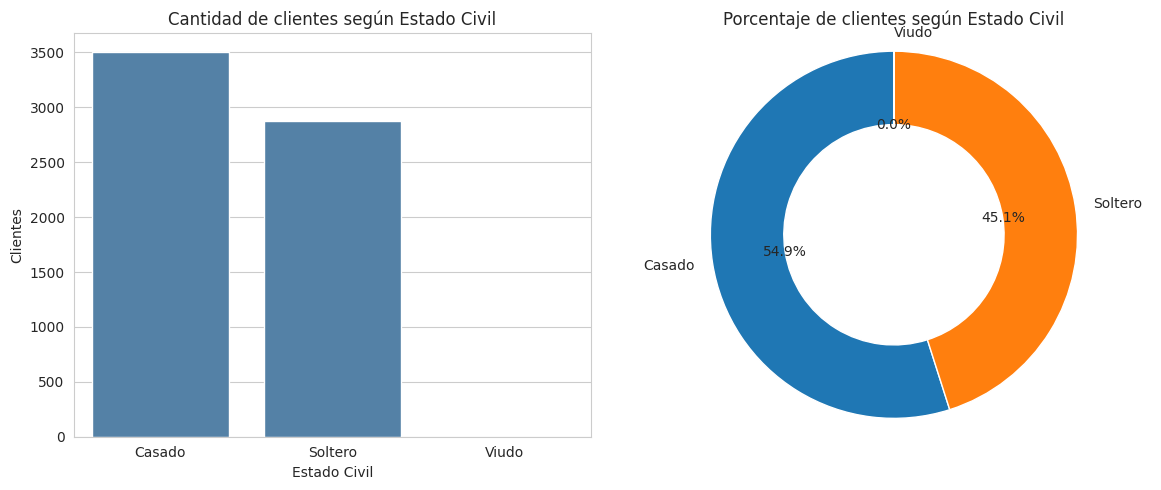

In [ ]:
sns.set_style("whitegrid")

counts_ec = data_clientes["EstadoCivil"].value_counts()
orden_ec  = counts_ec.index.tolist()
etiquetas_ec = ["Casado", "Soltero", "Viudo"]

# Figura con 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Subplot 1: Barplot
sns.countplot(
    x="EstadoCivil",
    data=data_clientes,
    order=orden_ec,
    color="steelblue",
    ax=axes[0]
)
axes[0].set_xlabel("Estado Civil")
axes[0].set_ylabel("Clientes")
axes[0].set_title("Cantidad de clientes según Estado Civil")
axes[0].set_xticklabels(etiquetas_ec)

# Subplot 2: Dona
wedges, texts, autotexts = axes[1].pie(
    counts_ec[orden_ec],
    labels=etiquetas_ec,
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops=dict(width=0.4, edgecolor="w")
)
axes[1].set_title("Porcentaje de clientes según Estado Civil")
axes[1].axis("equal")

plt.tight_layout()
plt.show()

/tmp/ipython-input-32-3580872550.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(etiquetas_gen)


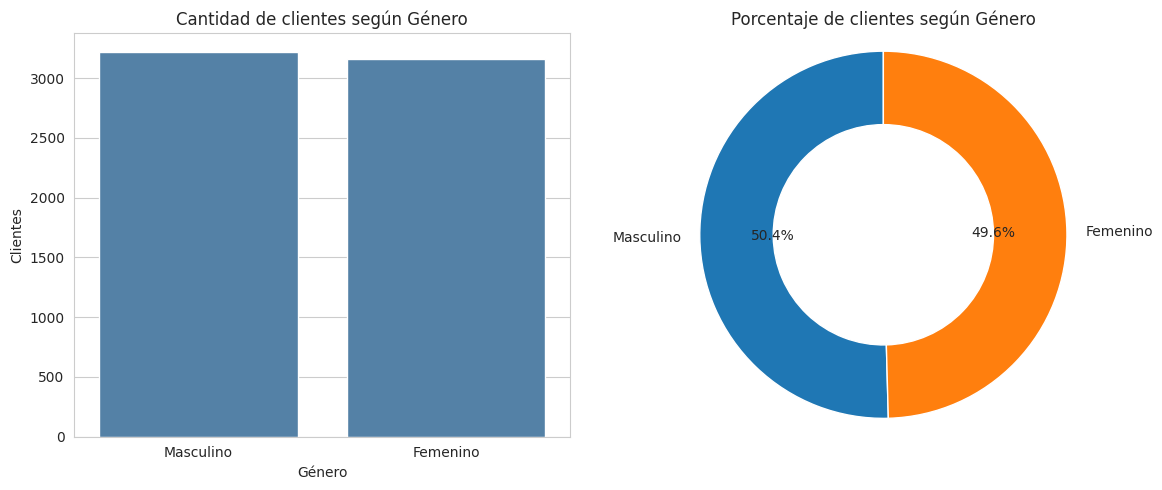

In [ ]:
sns.set_style("whitegrid")

counts_gen = data_clientes["Genero"].value_counts()
orden_gen  = counts_gen.index.tolist()
etiquetas_gen = ["Masculino", "Femenino"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Subplot 1: Barplot
sns.countplot(
    x="Genero",
    data=data_clientes,
    order=orden_gen,
    color="steelblue",
    ax=axes[0]
)
axes[0].set_xlabel("Género")
axes[0].set_ylabel("Clientes")
axes[0].set_title("Cantidad de clientes según Género")
axes[0].set_xticklabels(etiquetas_gen)

# Subplot 2: Dona
wedges, texts, autotexts = axes[1].pie(
    counts_gen[orden_gen],
    labels=etiquetas_gen,
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops=dict(width=0.4, edgecolor="w")
)
axes[1].set_title("Porcentaje de clientes según Género")
axes[1].axis("equal")

plt.tight_layout()
plt.show()

/tmp/ipython-input-33-4103727314.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(etiquetas_dist, rotation=30, ha="right")


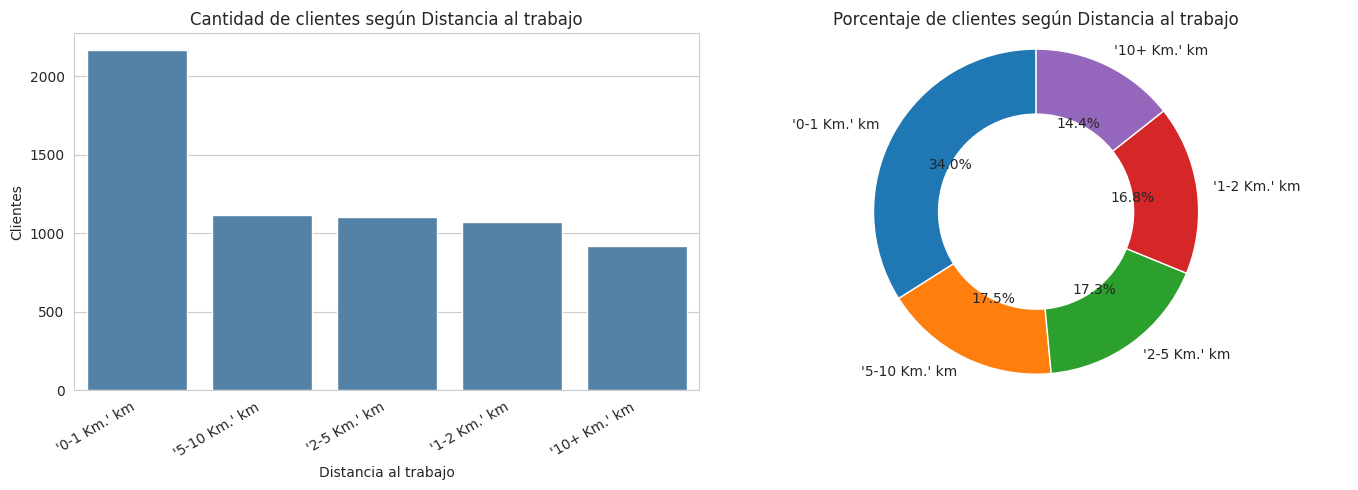

In [ ]:
sns.set_style("whitegrid")

counts_dist = data_clientes["Distancia"].value_counts()
orden_dist  = counts_dist.index.tolist()
etiquetas_dist = [f"{d} km" for d in orden_dist]

# Figura con 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Subplot 1: Barplot
sns.countplot(
    x="Distancia",
    data=data_clientes,
    order=orden_dist,
    color="steelblue",
    ax=axes[0]
)
axes[0].set_xlabel("Distancia al trabajo")
axes[0].set_ylabel("Clientes")
axes[0].set_title("Cantidad de clientes según Distancia al trabajo")
axes[0].set_xticklabels(etiquetas_dist, rotation=30, ha="right")

# Subplot 2: Dona
wedges, texts, autotexts = axes[1].pie(
    counts_dist[orden_dist],
    labels=etiquetas_dist,
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops=dict(width=0.4, edgecolor="w")
)
axes[1].set_title("Porcentaje de clientes según Distancia al trabajo")
axes[1].axis("equal")

plt.tight_layout()
plt.show()

/tmp/ipython-input-34-1507887788.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(etiquetas_reg, rotation=30, ha="right")


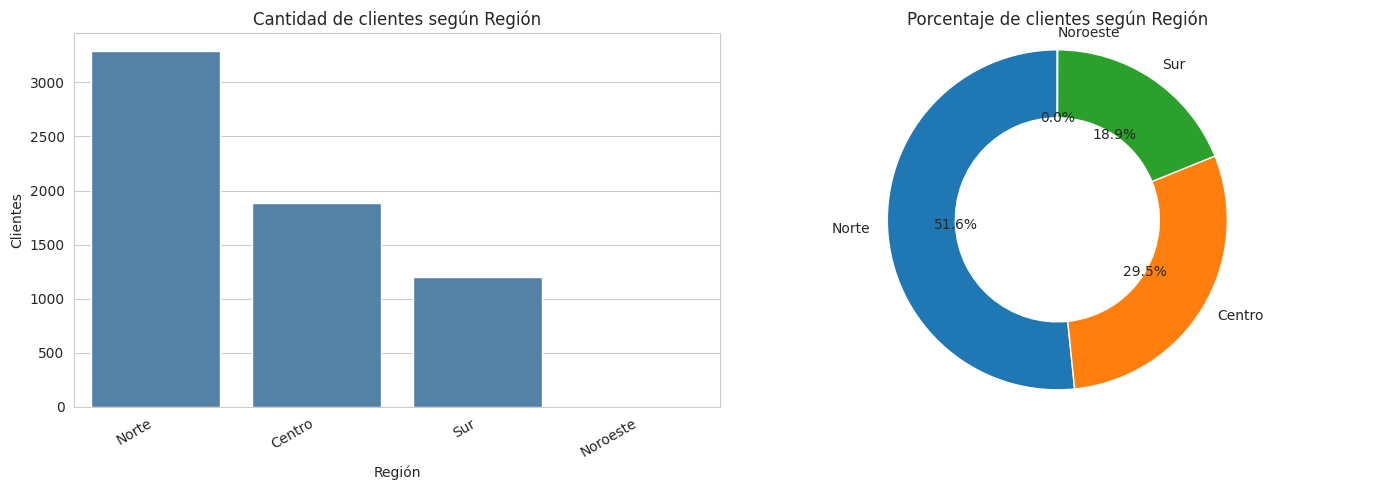

In [ ]:
sns.set_style("whitegrid")

counts_reg = data_clientes["Region"].value_counts()
orden_reg  = counts_reg.index.tolist()
etiquetas_reg = ["Norte", "Centro", "Sur", "Noroeste"]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Subplot 1: Barplot
sns.countplot(
    x="Region",
    data=data_clientes,
    order=orden_reg,
    color="steelblue",
    ax=axes[0]
)
axes[0].set_xlabel("Región")
axes[0].set_ylabel("Clientes")
axes[0].set_title("Cantidad de clientes según Región")
axes[0].set_xticklabels(etiquetas_reg, rotation=30, ha="right")

# Subplot 2: Dona
wedges, texts, autotexts = axes[1].pie(
    counts_reg[orden_reg],
    labels=etiquetas_reg,
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops=dict(width=0.4, edgecolor="w")
)
axes[1].set_title("Porcentaje de clientes según Región")
axes[1].axis("equal")

plt.tight_layout()
plt.show()

/tmp/ipython-input-35-797705793.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(etiquetas_compra)


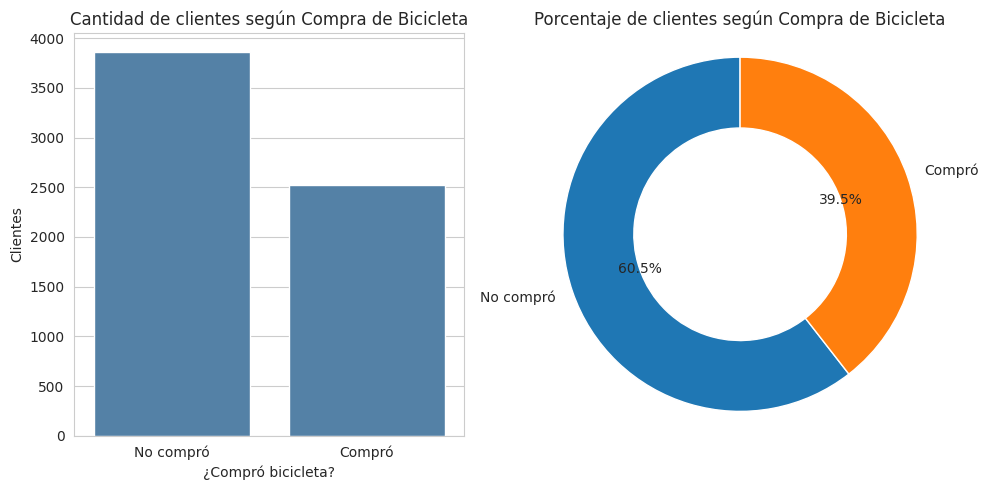

In [ ]:
sns.set_style("whitegrid")

counts_compra = data_clientes["ComproBicicleta"].value_counts()
orden_compra  = counts_compra.index.tolist()
etiquetas_compra = ["No compró", "Compró"]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Subplot 1: Barplot
sns.countplot(
    x="ComproBicicleta",
    data=data_clientes,
    order=orden_compra,
    color="steelblue",
    ax=axes[0]
)
axes[0].set_xlabel("¿Compró bicicleta?")
axes[0].set_ylabel("Clientes")
axes[0].set_title("Cantidad de clientes según Compra de Bicicleta")
axes[0].set_xticklabels(etiquetas_compra)

# Subplot 2: Dona
wedges, texts, autotexts = axes[1].pie(
    counts_compra[orden_compra],
    labels=etiquetas_compra,
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops=dict(width=0.4, edgecolor="w")
)
axes[1].set_title("Porcentaje de clientes según Compra de Bicicleta")
axes[1].axis("equal")

plt.tight_layout()
plt.show()

#**Análisis Multivariante**

Variables Numéricas

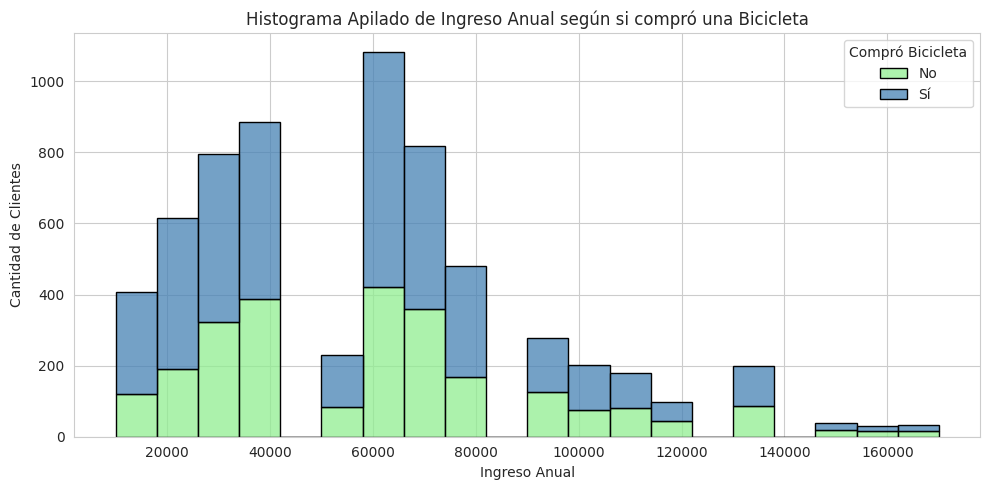

In [ ]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Histograma apilado por la variable booleana
sns.histplot(
    data=data_clientes,
    x="IngresoAnual",
    hue="ComproBicicleta",
    multiple="stack",
    palette={0: "steelblue", 1: "lightgreen"},
    edgecolor="black",
    bins=20,
    ax=ax
)

ax.set_title("Histograma Apilado de Ingreso Anual según si compró una Bicicleta")
ax.set_xlabel("Ingreso Anual")
ax.set_ylabel("Cantidad de Clientes")
ax.legend(title="Compró Bicicleta", labels=["No", "Sí"])

plt.tight_layout()
plt.show()


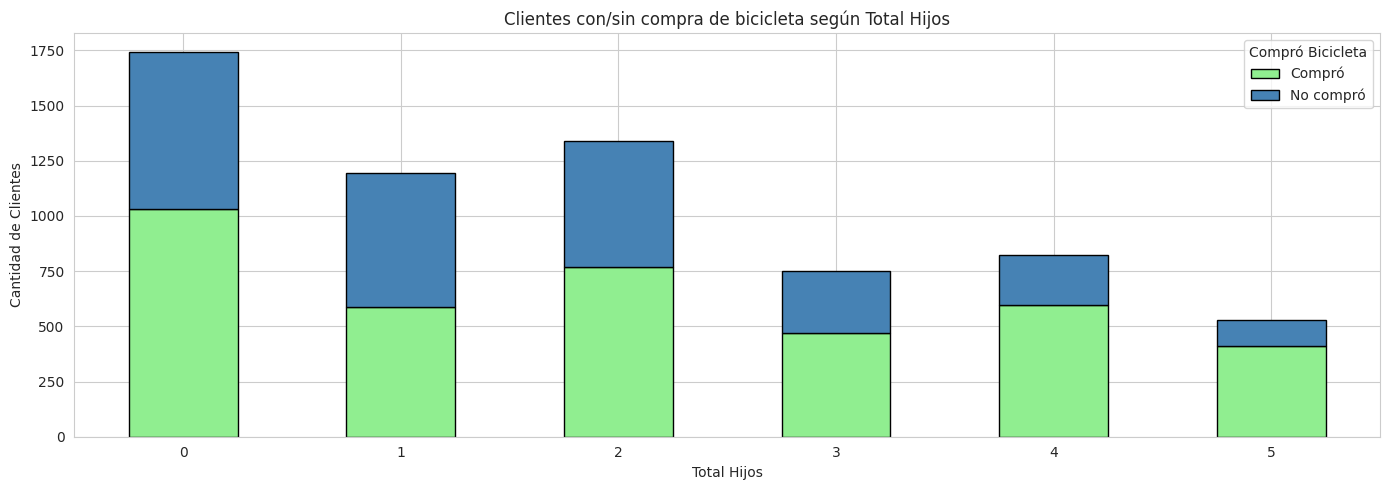

In [ ]:
counts = data_clientes.groupby(
    ["TotalHijos", "ComproBicicleta"]
).size().unstack(fill_value=0)

ax = counts.plot(
    kind="bar",
    stacked=True,
    color=["lightgreen", "steelblue"],
    edgecolor="black",
    figsize=(14, 5)
)

# Usamos las propias categorías de TotalHijos como etiquetas
ax.set_xticklabels([str(x) for x in counts.index], rotation=0)

ax.set_xlabel("Total Hijos")
ax.set_ylabel("Cantidad de Clientes")
ax.set_title("Clientes con/sin compra de bicicleta según Total Hijos")
ax.legend(["Compró", "No compró"], title="Compró Bicicleta")

plt.tight_layout()
plt.show()

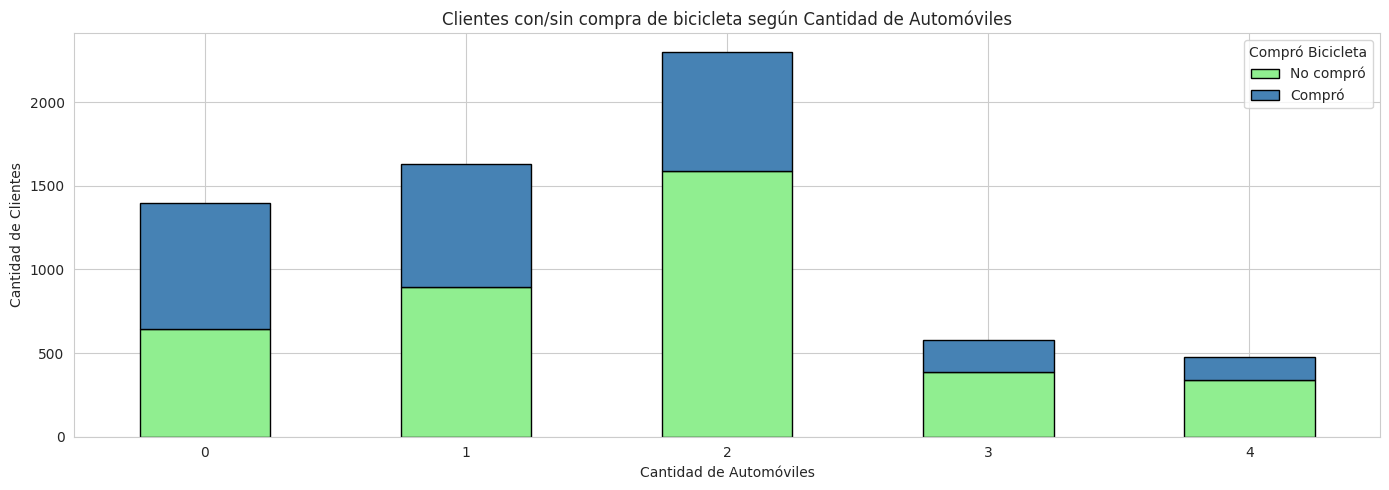

In [ ]:
counts = (
    data_clientes
    .groupby(["CantAutomoviles", "ComproBicicleta"])
    .size()
    .unstack(fill_value=0)
)

counts = counts.rename(columns={True: "Compró", False: "No compró"})

counts = counts[["No compró", "Compró"]]

ax = counts.plot(
    kind="bar",
    stacked=True,
    color=["lightgreen", "steelblue"],
    edgecolor="black",
    figsize=(14, 5)
)

ax.set_xticklabels([str(x) for x in counts.index], rotation=0)
ax.set_xlabel("Cantidad de Automóviles")
ax.set_ylabel("Cantidad de Clientes")
ax.set_title("Clientes con/sin compra de bicicleta según Cantidad de Automóviles")

ax.legend(title="Compró Bicicleta", labels=["No compró", "Compró"])

plt.tight_layout()
plt.show()


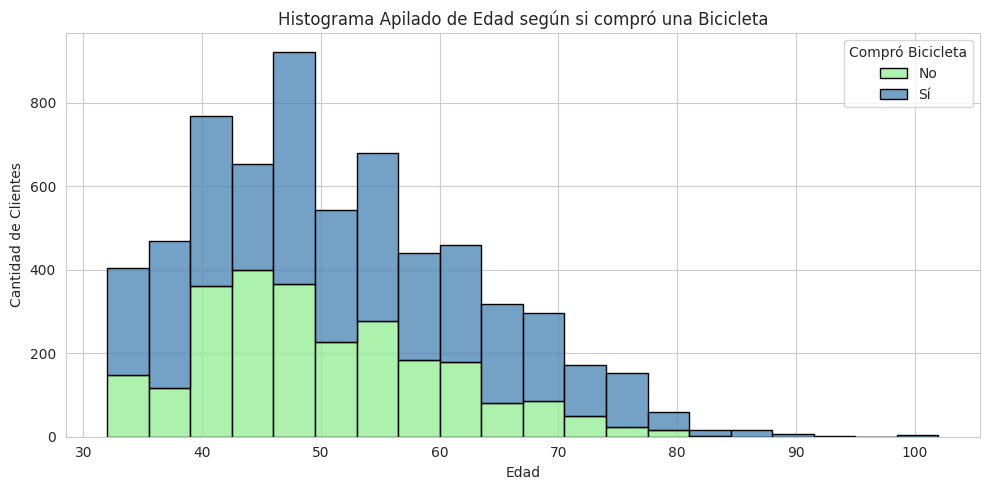

In [ ]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Histograma apilado por la variable booleana
sns.histplot(
    data=data_clientes,
    x="Edad",
    hue="ComproBicicleta",
    multiple="stack",
    palette={0: "steelblue", 1: "lightgreen"},
    edgecolor="black",
    bins=20,
    ax=ax
)

ax.set_title("Histograma Apilado de Edad según si compró una Bicicleta")
ax.set_xlabel("Edad")
ax.set_ylabel("Cantidad de Clientes")
ax.legend(title="Compró Bicicleta", labels=["No", "Sí"])

plt.tight_layout()
plt.show()


Variables Categóricas

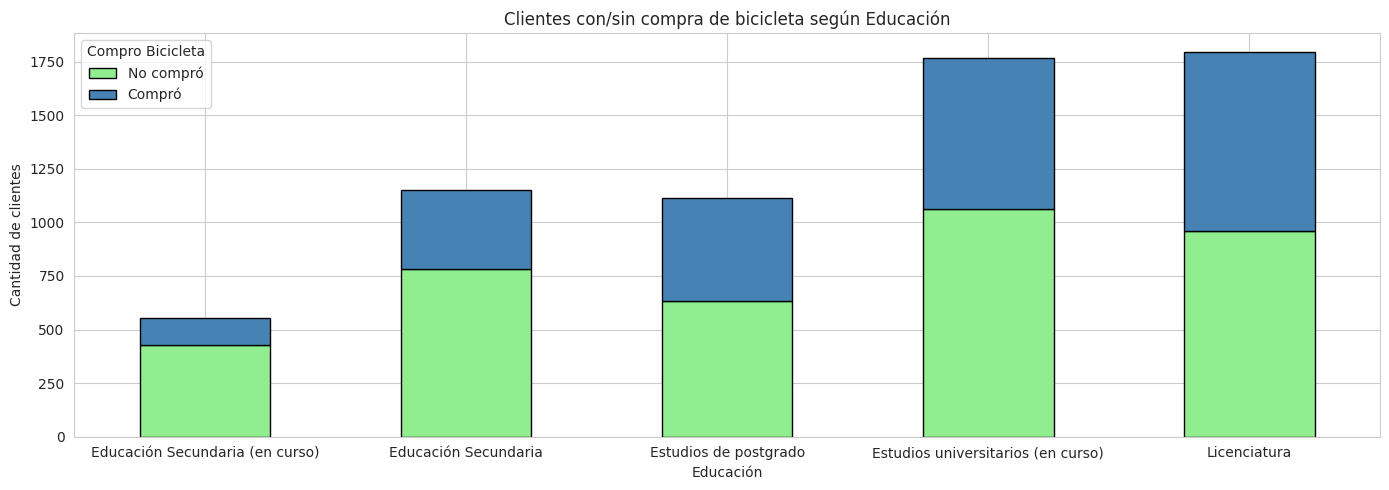

In [ ]:
counts = data_clientes.groupby(
    ["Educacion", "ComproBicicleta"]
).size().unstack(fill_value=0)

ax = counts.plot(
    kind="bar",
    stacked=True,
    color=["lightgreen", "steelblue"],
    edgecolor="black",
    figsize=(14, 5)
)

etiquetas_corregidas = [
    "Educación Secundaria (en curso)",
    "Educación Secundaria",
    "Estudios de postgrado",
    "Estudios universitarios (en curso)",
    "Licenciatura"
]

ax.set_xticklabels(etiquetas_corregidas, rotation=0)

ax.set_xlabel("Educación")
ax.set_ylabel("Cantidad de clientes")
ax.set_title("Clientes con/sin compra de bicicleta según Educación")
ax.legend(["No compró", "Compró"], title="Compro Bicicleta")

plt.tight_layout()
plt.show()

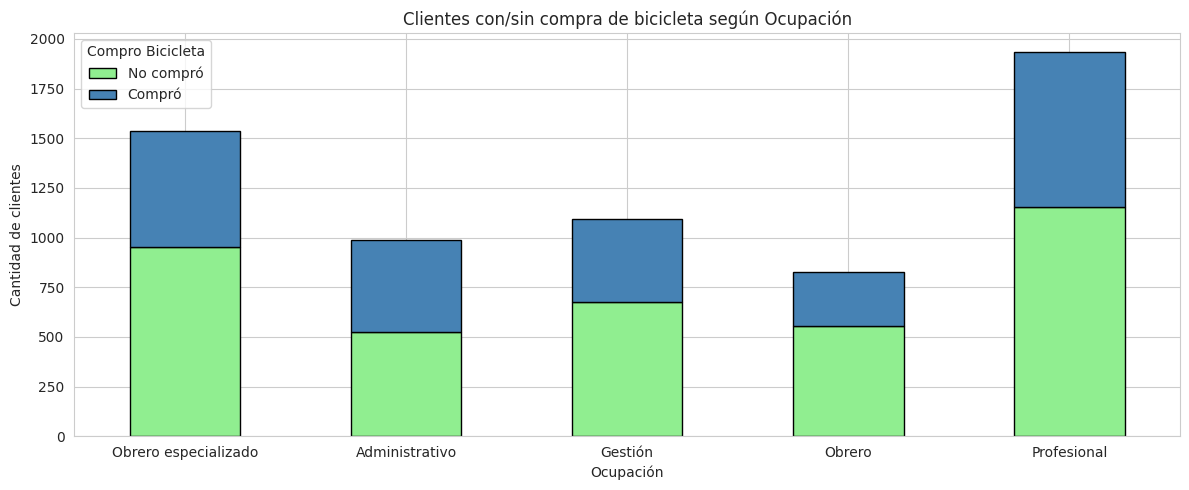

In [ ]:
counts = data_clientes.groupby(
    ["Ocupacion", "ComproBicicleta"]
).size().unstack(fill_value=0)

ax = counts.plot(
    kind="bar",
    stacked=True,
    color=["lightgreen", "steelblue"],
    edgecolor="black",
    figsize=(12, 5)
)

etiquetas_corregidas = [
    "Obrero especializado",
    "Administrativo",
    "Gestión",
    "Obrero",
    "Profesional"
]

ax.set_xticklabels(etiquetas_corregidas, rotation=0)

ax.set_xlabel("Ocupación")
ax.set_ylabel("Cantidad de clientes")
ax.set_title("Clientes con/sin compra de bicicleta según Ocupación")
ax.legend(["No compró", "Compró"], title="Compro Bicicleta")

plt.tight_layout()
plt.show()

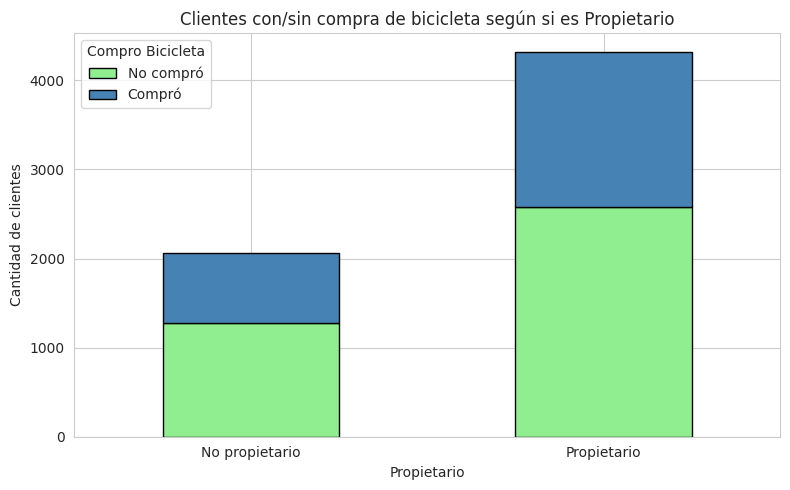

In [ ]:
counts = data_clientes.groupby(
    ["Propietario", "ComproBicicleta"]
).size().unstack(fill_value=0)

ax = counts.plot(
    kind="bar",
    stacked=True,
    color=["lightgreen", "steelblue"],
    edgecolor="black",
    figsize=(8, 5)
)

etiquetas_corregidas = [
    "No propietario",
    "Propietario",
]

ax.set_xticklabels(etiquetas_corregidas, rotation=0)

ax.set_xlabel("Propietario")
ax.set_ylabel("Cantidad de clientes")
ax.set_title("Clientes con/sin compra de bicicleta según si es Propietario")
ax.legend(["No compró", "Compró"], title="Compro Bicicleta")

plt.tight_layout()
plt.show()

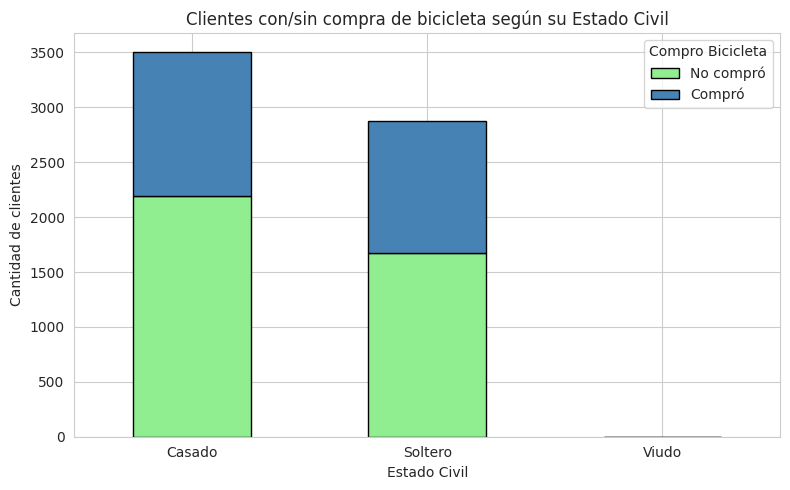

In [ ]:
counts = data_clientes.groupby(
    ["EstadoCivil", "ComproBicicleta"]
).size().unstack(fill_value=0)

ax = counts.plot(
    kind="bar",
    stacked=True,
    color=["lightgreen", "steelblue"],
    edgecolor="black",
    figsize=(8, 5)
)

etiquetas_corregidas = [
    "Casado",
    "Soltero",
    "Viudo"
]

ax.set_xticklabels(etiquetas_corregidas, rotation=0)

ax.set_xlabel("Estado Civil")
ax.set_ylabel("Cantidad de clientes")
ax.set_title("Clientes con/sin compra de bicicleta según su Estado Civil")
ax.legend(["No compró", "Compró"], title="Compro Bicicleta")

plt.tight_layout()
plt.show()

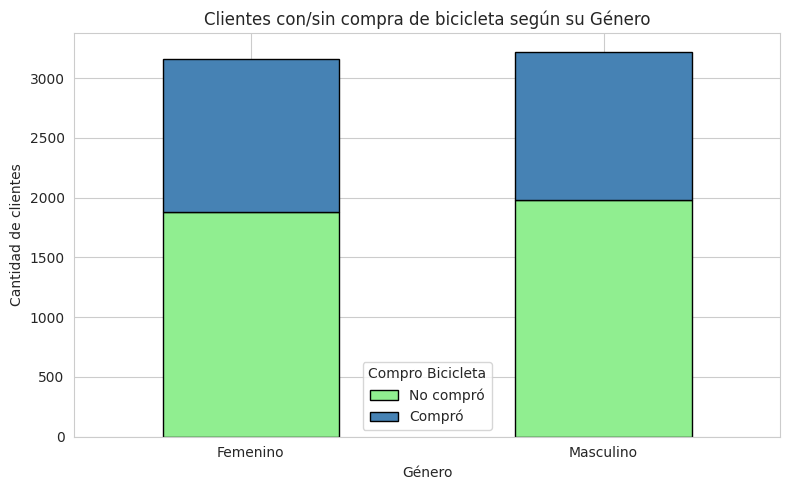

In [ ]:
counts = data_clientes.groupby(
    ["Genero", "ComproBicicleta"]
).size().unstack(fill_value=0)

ax = counts.plot(
    kind="bar",
    stacked=True,
    color=["lightgreen", "steelblue"],
    edgecolor="black",
    figsize=(8, 5)
)

etiquetas_corregidas = [
    "Femenino",
    "Masculino",
]

ax.set_xticklabels(etiquetas_corregidas, rotation=0)

ax.set_xlabel("Género")
ax.set_ylabel("Cantidad de clientes")
ax.set_title("Clientes con/sin compra de bicicleta según su Género")
ax.legend(["No compró", "Compró"], title="Compro Bicicleta")

plt.tight_layout()
plt.show()

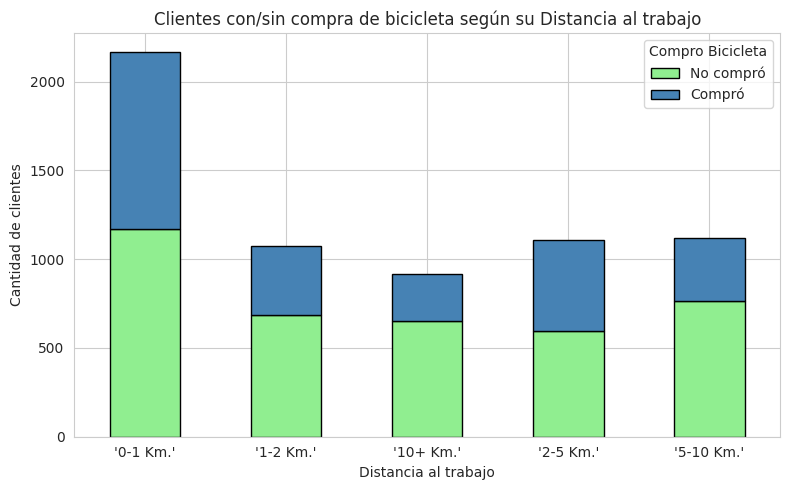

In [ ]:
counts = data_clientes.groupby(
    ["Distancia", "ComproBicicleta"]
).size().unstack(fill_value=0)

ax = counts.plot(
    kind="bar",
    stacked=True,
    color=["lightgreen", "steelblue"],
    edgecolor="black",
    figsize=(8, 5)
)

ax.set_xlabel("Distancia al trabajo")
ax.set_ylabel("Cantidad de clientes")
ax.set_title("Clientes con/sin compra de bicicleta según su Distancia al trabajo")
ax.legend(["No compró", "Compró"], title="Compro Bicicleta")

plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

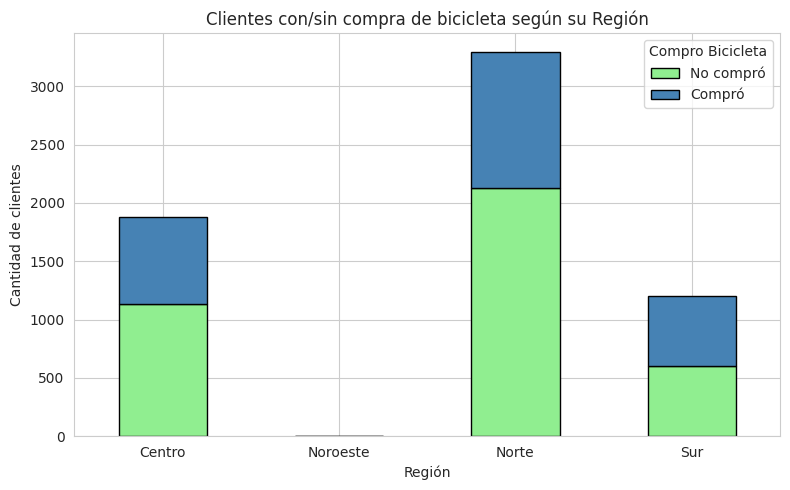

In [ ]:
counts = data_clientes.groupby(
    ["Region", "ComproBicicleta"]
).size().unstack(fill_value=0)

ax = counts.plot(
    kind="bar",
    stacked=True,
    color=["lightgreen", "steelblue"],
    edgecolor="black",
    figsize=(8, 5)
)

ax.set_xlabel("Región")
ax.set_ylabel("Cantidad de clientes")
ax.set_title("Clientes con/sin compra de bicicleta según su Región")
ax.legend(["No compró", "Compró"], title="Compro Bicicleta")

plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# Gráficos de barra estratificados (cruce de variables)

/tmp/ipython-input-59-3438835212.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(datos_para_box, labels=categorias, patch_artist=True)


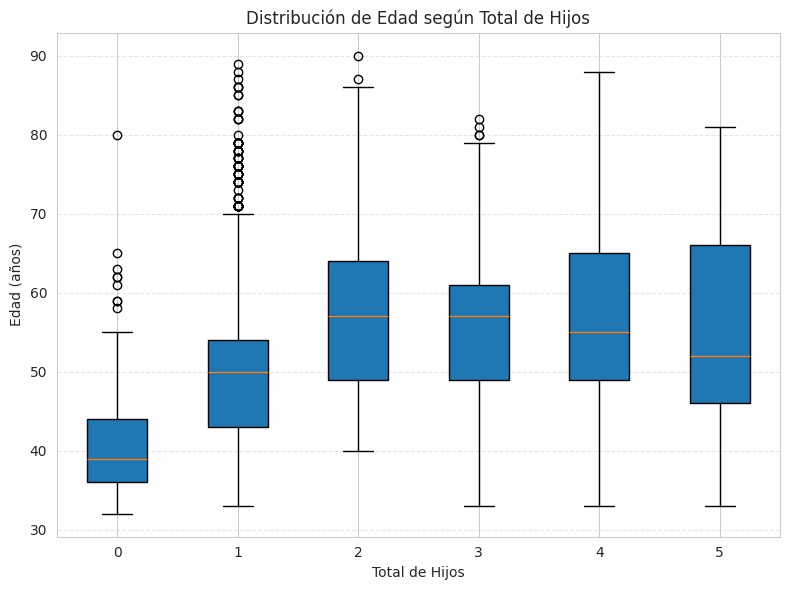

NameError: name 'df' is not defined

In [ ]:
categorias = sorted(data_clientes['TotalHijos'].unique())

datos_para_box = [ data_clientes.loc[data_clientes['TotalHijos']==c, 'Edad'] for c in categorias ]


plt.figure(figsize=(8,6))
plt.boxplot(datos_para_box, labels=categorias, patch_artist=True)
plt.xlabel('Total de Hijos')
plt.ylabel('Edad (años)')
plt.title('Distribución de Edad según Total de Hijos')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

categorias = sorted(df['TotalHijos'].unique())
colores = plt.cm.viridis_r(np.linspace(0,1,len(categorias)))

# Histr estratificado
datos_edades = [df.loc[df['TotalHijos']==c, 'Edad'] for c in categorias]

plt.figure(figsize=(8,6))
plt.hist(datos_edades,
         bins=15,
         stacked=True,
         color=colores,
         label=[f'{c} hijos' for c in categorias],
         edgecolor='white')
plt.xlabel('Edad (años)')
plt.ylabel('Número de clientes')
plt.title('Histograma apilado de Edad segmentado por Total de Hijos')
plt.legend(title='Total Hijos', bbox_to_anchor=(1.02,1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
sns.scatterplot(data=data_clientes, x="IngresoAnual", y="Ocupacion", hue="ComproBicicleta")
plt.title("Scatterplot del Ingreso Anual VS Ocupacion")
plt.show()

In [ ]:
sns.scatterplot(data=data_clientes, x="CantAutomoviles", y="Distancia", hue="ComproBicicleta")
plt.title("Scatterplot del Cantidad de Automoviles VS Distancia")
plt.show()

In [ ]:
sns.scatterplot(data=data_clientes, x="Distancia", y="Edad", hue="ComproBicicleta")
plt.title("Scatterplot del Distancia Vs Edad")
plt.show()

# Limpieza de Datos: Valores ausentes y Atípicos

---



Valores Ausentes (NA)

In [ ]:
data_clientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6370 entries, 0 to 6378
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   EstadoCivil      6370 non-null   object 
 1   Genero           6370 non-null   object 
 2   IngresoAnual     6370 non-null   float64
 3   TotalHijos       6370 non-null   int64  
 4   Educacion        6370 non-null   object 
 5   Ocupacion        6370 non-null   object 
 6   Propietario      6370 non-null   int64  
 7   CantAutomoviles  6370 non-null   int64  
 8   Distancia        6370 non-null   object 
 9   Region           6370 non-null   object 
 10  Edad             6370 non-null   int64  
 11  ComproBicicleta  6370 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 647.0+ KB


In [ ]:
#Reemplazamos  valores faltantes en la columna IngresoAnual del dataframe con la mediana de los
#valores no faltantes en esa columna.
data_clientes.loc[data_clientes["IngresoAnual"].isna(), "IngresoAnual"] = data_clientes.IngresoAnual.median()
data_clientes.describe()

,IngresoAnual,TotalHijos,Propietario,CantAutomoviles,Edad,ComproBicicleta
count,6370.000000,6370.000000,6370.000000,6370.000000,6370.000000,6370.000000
mean,57593.406593,1.890424,0.677237,1.545212,51.100628,0.395290
std,32372.088282,1.628348,0.467570,1.146751,11.381676,0.488951
min,10000.000000,0.000000,0.000000,0.000000,32.000000,0.000000
25%,30000.000000,0.000000,0.000000,1.000000,42.000000,0.000000
50%,60000.000000,2.000000,1.000000,2.000000,49.000000,0.000000
75%,70000.000000,3.000000,1.000000,2.000000,59.000000,1.000000
max,170000.000000,5.000000,1.000000,4.000000,90.000000,1.000000


In [ ]:
data_clientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6370 entries, 0 to 6378
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   EstadoCivil      6370 non-null   object 
 1   Genero           6370 non-null   object 
 2   IngresoAnual     6370 non-null   float64
 3   TotalHijos       6370 non-null   int64  
 4   Educacion        6370 non-null   object 
 5   Ocupacion        6370 non-null   object 
 6   Propietario      6370 non-null   int64  
 7   CantAutomoviles  6370 non-null   int64  
 8   Distancia        6370 non-null   object 
 9   Region           6370 non-null   object 
 10  Edad             6370 non-null   int64  
 11  ComproBicicleta  6370 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 647.0+ KB


No hay más nulos

Valores Atípicos (Outliers)

In [ ]:
# OUTLIERS Ingreso Anual
# Para determinar la desigualdad, nos fijamos a partir de qué valores aproximados hay outliers en los box plot
data_clientes[data_clientes["IngresoAnual"] > 140000]

,EstadoCivil,Genero,IngresoAnual,TotalHijos,Educacion,Ocupacion,Propietario,CantAutomoviles,Distancia,Region,Edad,ComproBicicleta
50,C,F,150000.0,1,'Estudios de postgrado',Gestiï¿½n,1,2,'2-5 Km.',Norte,75,1
69,C,F,160000.0,3,'Estudios universitarios (en curso)',Gestiï¿½n,1,4,'0-1 Km.',Centro,63,1
143,C,F,150000.0,2,'Estudios universitarios (en curso)',Profesional,1,3,'0-1 Km.',Centro,55,1
155,S,F,170000.0,3,'Estudios universitarios (en curso)',Profesional,0,4,'0-1 Km.',Centro,56,0
183,S,M,150000.0,2,'Educaciï¿½n secundaria',Profesional,0,4,'0-1 Km.',Centro,56,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6125,S,M,160000.0,0,'Estudios de postgrado',Gestiï¿½n,0,0,'2-5 Km.',Norte,46,0
6132,C,F,160000.0,1,Licenciatura,Gestiï¿½n,1,4,'0-1 Km.',Norte,70,0
6180,S,F,170000.0,1,'Estudios de postgrado',Gestiï¿½n,0,1,'0-1 Km.',Norte,44,1
6263,S,F,150000.0,0,Licenciatura,Gestiï¿½n,0,3,'0-1 Km.',Norte,48,1


In [ ]:
# OUTLIERS Cantidad automoviles
# Para determinar la desigualdad, nos fijamos a partir de qué valores aproximados hay outliers en los box plot
data_clientes[data_clientes["CantAutomoviles"] > 3.5]

,EstadoCivil,Genero,IngresoAnual,TotalHijos,Educacion,Ocupacion,Propietario,CantAutomoviles,Distancia,Region,Edad,ComproBicicleta
0,C,M,60000.0,0,Licenciatura,Profesional,1,4,'10+ Km.',Sur,38,0
45,C,M,120000.0,4,Licenciatura,Gestiï¿½n,1,4,'10+ Km.',Centro,66,1
60,C,M,130000.0,3,Licenciatura,Gestiï¿½n,1,4,'0-1 Km.',Centro,68,0
69,C,F,160000.0,3,'Estudios universitarios (en curso)',Gestiï¿½n,1,4,'0-1 Km.',Centro,63,1
75,S,F,120000.0,1,'Estudios universitarios (en curso)',Profesional,1,4,'5-10 Km.',Norte,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6348,C,F,70000.0,5,Licenciatura,Profesional,1,4,'10+ Km.',Sur,46,0
6352,C,M,110000.0,0,'Educaciï¿½n secundaria (en curso)',Profesional,1,4,'10+ Km.',Sur,42,1
6354,S,M,110000.0,5,Licenciatura,Gestiï¿½n,1,4,'2-5 Km.',Sur,54,0
6355,C,M,100000.0,3,'Estudios universitarios (en curso)',Gestiï¿½n,1,4,'10+ Km.',Centro,62,0


In [ ]:
# OUTLIERS EDAD
# Para determinar la desigualdad, nos fijamos a partir de qué valores aproximados hay outliers en los box plot
data_clientes[data_clientes["Edad"] > 84]


,EstadoCivil,Genero,IngresoAnual,TotalHijos,Educacion,Ocupacion,Propietario,CantAutomoviles,Distancia,Region,Edad,ComproBicicleta
513,S,F,10000.0,4,'Educaciï¿½n secundaria',Obrero,1,2,'0-1 Km.',Centro,86,0
753,S,F,10000.0,4,'Estudios universitarios (en curso)',Obrero,0,2,'0-1 Km.',Centro,87,0
1030,C,M,10000.0,4,'Educaciï¿½n secundaria',Obrero,0,2,'0-1 Km.',Centro,86,0
1150,C,F,40000.0,1,Licenciatura,Administrativo,1,0,'0-1 Km.',Centro,86,0
1159,C,M,20000.0,2,'Educaciï¿½n secundaria',Obrero,1,1,'2-5 Km.',Centro,85,0
1268,S,M,50000.0,1,Licenciatura,Profesional,0,1,'0-1 Km.',Sur,86,0
1797,S,M,40000.0,2,'Educaciï¿½n secundaria','Obrero especializado',0,1,'0-1 Km.',Norte,86,0
2169,S,F,50000.0,1,'Estudios de postgrado',Profesional,1,1,'2-5 Km.',Norte,88,0
2366,C,M,20000.0,2,'Educaciï¿½n secundaria',Obrero,0,1,'1-2 Km.',Centro,87,0
2544,C,M,30000.0,1,Licenciatura,Administrativo,1,1,'2-5 Km.',Centro,87,0


In [ ]:
(data_clientes["Edad"] > 84).sum()

np.int64(19)

Tomamos la decision de eliminar los outliers porque:
1-No representan una porción significativa de los registros (menos del 10%).
2-Su presencia afectaría el modelado, sobre todo de KNN, LDA, y Regresion Logística.
3-Consideramos que son valores atípicos claros

In [ ]:
# Eliminamos los outliers de edad mayores a 90
data_clientes = data_clientes[data_clientes["Edad"] <= 90]

In [ ]:
data_clientes = data_clientes.rename(columns={"Distancia'1-2 Km.'": 'Distancia1-2'})
data_clientes = data_clientes.rename(columns={"Distancia'10+ Km.'": 'Distancia10+'})
data_clientes = data_clientes.rename(columns={"Distancia'2-5 Km.'": 'Distancia2-5'})
data_clientes = data_clientes.rename(columns={"Distancia'5-10 Km.'": 'Distancia5-10'})
data_clientes = data_clientes.rename(columns={"Educacion'Educaciï¿½n secundaria'": 'EduSecu'})
data_clientes = data_clientes.rename(columns={"Educacion'Estudios de postgrado'": 'EduPost'})
data_clientes = data_clientes.rename(columns={"Educacion'Estudios universitarios (en curso)'": 'EduUni'})
data_clientes = data_clientes.rename(columns={"Ocupacion_Gestiï¿½n": 'Ocupacion_gestion'})
data_clientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6370 entries, 0 to 6378
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   EstadoCivil      6370 non-null   object 
 1   Genero           6370 non-null   object 
 2   IngresoAnual     6370 non-null   float64
 3   TotalHijos       6370 non-null   int64  
 4   Educacion        6370 non-null   object 
 5   Ocupacion        6370 non-null   object 
 6   Propietario      6370 non-null   int64  
 7   CantAutomoviles  6370 non-null   int64  
 8   Distancia        6370 non-null   object 
 9   Region           6370 non-null   object 
 10  Edad             6370 non-null   int64  
 11  ComproBicicleta  6370 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 647.0+ KB


In [ ]:
data_clientes.head()

,EstadoCivil,Genero,IngresoAnual,TotalHijos,Educacion,Ocupacion,Propietario,CantAutomoviles,Distancia,Region,Edad,ComproBicicleta
0,C,M,60000.0,0,Licenciatura,Profesional,1,4,'10+ Km.',Sur,38,0
1,S,F,50000.0,2,Licenciatura,'Obrero especializado',1,0,'2-5 Km.',Norte,44,1
2,S,F,60000.0,1,'Estudios de postgrado','Obrero especializado',1,0,'1-2 Km.',Norte,41,0
3,S,F,30000.0,0,'Educaciï¿½n secundaria',Obrero,0,1,'2-5 Km.',Centro,42,1
4,S,F,10000.0,2,'Educaciï¿½n secundaria',Obrero,1,0,'0-1 Km.',Centro,42,1


In [ ]:
# Script para crear .csv sin hacer el split
data_clientes.to_csv("/content/drive/My Drive/Tps Ciencia de Datos/TPI/Base de datos/data_clientes_limpios.csv", index=False)

# Matriz de Correlación

In [ ]:
data_clientes.corr()

ValueError: could not convert string to float: 'C'

# Transformación de Datos

Ya imputamos valores nulos y eliminamos (en este caso) outliers. Ahora tenemos que estandarizar variables numericas y codificar las categoricas

In [ ]:
#Transformamos variables categóricas en numéricas con one_hot_encoding porque no podemos introducir datos
#cualitativos en un árbol y así mejoramos la predicción.
def one_hot_encoding(df, categorical_features, final_columns=None, drop_originals=True):

  # Realizar codificación one-hot
  encoded_features = pd.get_dummies(df[categorical_features], drop_first=True)
  df = pd.concat([df, encoded_features*1], axis=1)

  if drop_originals:
    df = df.drop(categorical_features, axis=1)

  # Asegurar que todas las columnas finales estén presentes
  if final_columns is not None:
    for column in final_columns:
      if column not in df.columns:
        df[column] = 0  # Añadir la columna faltante con ceros

  return df

In [ ]:
#Aplicamos one hot encoding a nuestro dataframe
vars_cat = data_clientes.select_dtypes(include='object').columns
df_aff_encoded = one_hot_encoding(data_clientes, vars_cat)
df_aff_encoded.head()

,IngresoAnual,TotalHijos,Propietario,CantAutomoviles,Edad,ComproBicicleta,EstadoCivil_S,EstadoCivil_V,Genero_M,Educacion_'Educaciï¿½n secundaria',...,Ocupacion_Gestiï¿½n,Ocupacion_Obrero,Ocupacion_Profesional,Distancia_'1-2 Km.',Distancia_'10+ Km.',Distancia_'2-5 Km.',Distancia_'5-10 Km.',Region_Noroeste,Region_Norte,Region_Sur
0,60000.0,0,1,4,38,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
1,50000.0,2,1,0,44,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,60000.0,1,1,0,41,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,30000.0,0,0,1,42,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
4,10000.0,2,1,0,42,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0


Ahora tenemos que estandarizar las variable numéricas para que haya una escala que funcione para el KNN

In [ ]:
df_aff_encoded.corr()

,IngresoAnual,TotalHijos,Propietario,CantAutomoviles,Edad,ComproBicicleta,EstadoCivil_S,EstadoCivil_V,Genero_M,Educacion_'Educaciï¿½n secundaria',...,Ocupacion_Gestiï¿½n,Ocupacion_Obrero,Ocupacion_Profesional,Distancia_'1-2 Km.',Distancia_'10+ Km.',Distancia_'2-5 Km.',Distancia_'5-10 Km.',Region_Noroeste,Region_Norte,Region_Sur
IngresoAnual,1.000000,0.222531,0.050331,0.469593,0.163997,0.054556,-0.109732,0.004055,0.002254,-0.124355,...,0.490510,-0.489567,0.330175,-0.100146,0.261981,-0.001065,0.068974,-0.010682,0.158580,0.117656
TotalHijos,0.222531,1.000000,0.190902,0.275001,0.496932,-0.129580,-0.164568,0.001193,-0.010207,0.024569,...,0.193315,-0.175535,0.158503,-0.033423,0.186401,-0.015800,-0.011309,-0.014548,0.103534,-0.039459
Propietario,0.050331,0.190902,1.000000,-0.053015,0.119162,0.020409,-0.308408,-0.006718,-0.008034,-0.083651,...,0.052972,-0.113248,0.000893,-0.164592,0.127895,0.063276,0.154989,0.008650,0.061288,-0.037504
CantAutomoviles,0.469593,0.275001,-0.053015,1.000000,0.171549,-0.177771,-0.028023,-0.016154,0.004171,0.158041,...,0.306821,-0.158377,0.138617,-0.031454,0.361141,-0.114264,0.162731,-0.016886,-0.017614,0.186829
Edad,0.163997,0.496932,0.119162,0.171549,1.000000,-0.098899,-0.187401,0.004515,0.007799,-0.010785,...,0.349388,-0.151190,0.038590,-0.001098,0.167933,-0.036373,0.073731,0.002091,0.088629,-0.071229
ComproBicicleta,0.054556,-0.129580,0.020409,-0.177771,-0.098899,1.000000,0.044349,0.021919,-0.019952,-0.069776,...,-0.013339,-0.050341,0.011528,-0.029497,-0.089757,0.064978,-0.073917,0.015498,-0.086679,0.103750
EstadoCivil_S,-0.109732,-0.164568,-0.308408,-0.028023,-0.187401,0.044349,1.000000,-0.016058,-0.047721,0.029125,...,-0.071443,0.143913,-0.046637,0.049036,-0.053042,-0.011463,0.011935,0.013829,-0.051639,-0.015629
EstadoCivil_V,0.004055,0.001193,-0.006718,-0.016154,0.004515,0.021919,-0.016058,1.000000,-0.000156,0.014720,...,-0.008061,-0.006817,0.026840,0.015726,-0.007263,-0.008114,-0.008172,-0.000222,-0.000590,0.014089
Genero_M,0.002254,-0.010207,-0.008034,0.004171,0.007799,-0.019952,-0.047721,-0.000156,1.000000,0.012200,...,0.018495,0.018639,-0.016730,0.009900,0.003556,0.006758,-0.010247,-0.012641,-0.007518,0.002577
Educacion_'Educaciï¿½n secundaria',-0.124355,0.024569,-0.083651,0.158041,-0.010785,-0.069776,0.029125,0.014720,0.012200,1.000000,...,-0.086791,0.192191,-0.001910,0.020352,0.023998,-0.021899,0.127020,-0.005881,-0.027881,-0.022089


In [ ]:
df_aff_encoded = df_aff_encoded.rename(columns={"Distancia_'1-2 Km.'": 'Distancia1-2'})
df_aff_encoded = df_aff_encoded.rename(columns={"Distancia_'10+ Km.'": 'Distancia10+'})
df_aff_encoded = df_aff_encoded.rename(columns={"Distancia_'2-5 Km.'": 'Distancia2-5'})
df_aff_encoded = df_aff_encoded.rename(columns={"Distancia_'5-10 Km.'": 'Distancia5-10'})
df_aff_encoded = df_aff_encoded.rename(columns={"Educacion_'Educaciï¿½n secundaria'": 'EduSecu'})
df_aff_encoded = df_aff_encoded.rename(columns={"Educacion_'Estudios de postgrado'": 'Educacion_postgrado'})
df_aff_encoded = df_aff_encoded.rename(columns={"Educacion_'Estudios universitarios (en curso)'": 'Educacion_estudios_universitarios'})
df_aff_encoded = df_aff_encoded.rename(columns={"Ocupacion_Gestiï¿½n": 'Ocupacion_gestion'})
df_aff_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6370 entries, 0 to 6378
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IngresoAnual                       6370 non-null   float64
 1   TotalHijos                         6370 non-null   int64  
 2   Propietario                        6370 non-null   int64  
 3   CantAutomoviles                    6370 non-null   int64  
 4   Edad                               6370 non-null   int64  
 5   ComproBicicleta                    6370 non-null   int64  
 6   EstadoCivil_S                      6370 non-null   int64  
 7   EstadoCivil_V                      6370 non-null   int64  
 8   Genero_M                           6370 non-null   int64  
 9   EduSecu                            6370 non-null   int64  
 10  Educacion_postgrado                6370 non-null   int64  
 11  Educacion_estudios_universitarios  6370 non-null   int64  
 1

In [ ]:
list_x = [c for c in df_aff_encoded.columns if c != 'ComproBicicleta']
scaler = StandardScaler()
scaler.fit(df_aff_encoded[list_x])

X = scaler.transform(df_aff_encoded[list_x])
y = df_aff_encoded.ComproBicicleta

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17, stratify = y)

#Exportar archivos

In [ ]:
# EXPORTAR COMO CSV
# 1. Reconstruir DataFrames para los features
X_train_df = pd.DataFrame(X_train, columns=list_x)
X_test_df  = pd.DataFrame(X_test , columns=list_x)

# 2. Reconstruir Series/DataFrames para la variable objetivo
y_train_df = pd.DataFrame(y_train, columns=["ComproBicicleta"])
y_test_df  = pd.DataFrame(y_test , columns=["ComproBicicleta"])

# 3. Opcional: concatenar features + target para tener un solo CSV por split
train_df = pd.concat([X_train_df.reset_index(drop=True),
                      y_train_df.reset_index(drop=True)], axis=1)
test_df  = pd.concat([X_test_df.reset_index(drop=True),
                      y_test_df.reset_index(drop=True)], axis=1)
# 4. Exportar csv
base_path = "/content/drive/My Drive/Tps Ciencia de Datos/TPI/Base de datos/"

train_df.to_csv(base_path + "train_set.csv", index=False, encoding="utf-8")
test_df.to_csv( base_path + "test_set.csv",  index=False, encoding="utf-8")


In [ ]:
# Script para crear .csv sin hacer el split
data_clientes.to_csv("/content/drive/My Drive/Tps Ciencia de Datos/TPI/Base de datos/data_clientes.csv", index=False)

In [ ]:
data_clientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6370 entries, 0 to 6378
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   EstadoCivil      6370 non-null   object 
 1   Genero           6370 non-null   object 
 2   IngresoAnual     6370 non-null   float64
 3   TotalHijos       6370 non-null   int64  
 4   Educacion        6370 non-null   object 
 5   Ocupacion        6370 non-null   object 
 6   Propietario      6370 non-null   int64  
 7   CantAutomoviles  6370 non-null   int64  
 8   Distancia        6370 non-null   object 
 9   Region           6370 non-null   object 
 10  Edad             6370 non-null   int64  
 11  ComproBicicleta  6370 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 647.0+ KB


In [ ]:
df_aff_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6370 entries, 0 to 6378
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IngresoAnual                       6370 non-null   float64
 1   TotalHijos                         6370 non-null   int64  
 2   Propietario                        6370 non-null   int64  
 3   CantAutomoviles                    6370 non-null   int64  
 4   Edad                               6370 non-null   int64  
 5   ComproBicicleta                    6370 non-null   int64  
 6   EstadoCivil_S                      6370 non-null   int64  
 7   EstadoCivil_V                      6370 non-null   int64  
 8   Genero_M                           6370 non-null   int64  
 9   EduSecu                            6370 non-null   int64  
 10  Educacion_postgrado                6370 non-null   int64  
 11  Educacion_estudios_universitarios  6370 non-null   int64  
 1

#**K-Nearest-Neighbour** (KNN)

Entrenamos el modelo KNN mediante la clase KNeighborsClassifier. Usamos el parametro weights que ponderar los puntos por la inversa de su distancia. En este caso, los vecinos más cercanos de un punto de consulta tendrán una mayor influencia que los vecinos más alejados. Probamos valores de K entre 1 y 10 vecinos mas cercanos y evaluamos métricas tales como el Accuracy y el Recall

In [ ]:
from sklearn.metrics import recall_score

k_values = []
accuracy_train = []
accuracy_test = []
recall_train = []
recall_test = []

for k in range(1,11,1):
  knn = KNeighborsClassifier(k, weights= "distance")
  knn.fit(X_train, y_train)
  pred_train = knn.predict(X_train)
  pred_test = knn.predict(X_test)

  #Guardo valores para generar gráfica de Accuracy VS Valor de K
  k_values.append(k)
  accuracy_train.append(knn.score(X_train, y_train))
  accuracy_test.append(knn.score(X_test, y_test))

  #Guardo valores para generar gráfica de F1-Score VS Valor de K
  recall_train.append(recall_score(y_train, pred_train, average='macro'))
  recall_test.append(recall_score(y_test, pred_test, average='macro'))


  print("_______________________________________")
  print(f"K igual a {k}: ")
  print(f'Accuracy de K-NN train: {knn.score(X_train, y_train):.4f}')
  print(f"Recall de K-NN train: {recall_score(y_train, pred_train, average='macro'):.4f}")
  print(f'Accuracy de K-NN test: {knn.score(X_test, y_test):.4f}')
  print(f"Recall de K-NN test: {recall_score(y_test, pred_test, average='macro'):.4f}")

_______________________________________
K igual a 1: 
Accuracy de K-NN train: 0.9320
Recall de K-NN train: 0.9294
Accuracy de K-NN test: 0.7389
Recall de K-NN test: 0.7253
_______________________________________
K igual a 2: 
Accuracy de K-NN train: 0.9330
Recall de K-NN train: 0.9182
Accuracy de K-NN test: 0.7433
Recall de K-NN test: 0.7199
_______________________________________
K igual a 3: 
Accuracy de K-NN train: 0.9391
Recall de K-NN train: 0.9295
Accuracy de K-NN test: 0.7445
Recall de K-NN test: 0.7234
_______________________________________
K igual a 4: 
Accuracy de K-NN train: 0.9395
Recall de K-NN train: 0.9281
Accuracy de K-NN test: 0.7451
Recall de K-NN test: 0.7217
_______________________________________
K igual a 5: 
Accuracy de K-NN train: 0.9401
Recall de K-NN train: 0.9298
Accuracy de K-NN test: 0.7464
Recall de K-NN test: 0.7244
_______________________________________
K igual a 6: 
Accuracy de K-NN train: 0.9401
Recall de K-NN train: 0.9295
Accuracy de K-NN test: 0.7

Para visualizar como evolucionan estas métricas para un valor de K en específico podemos generar gráficas como las siguientes

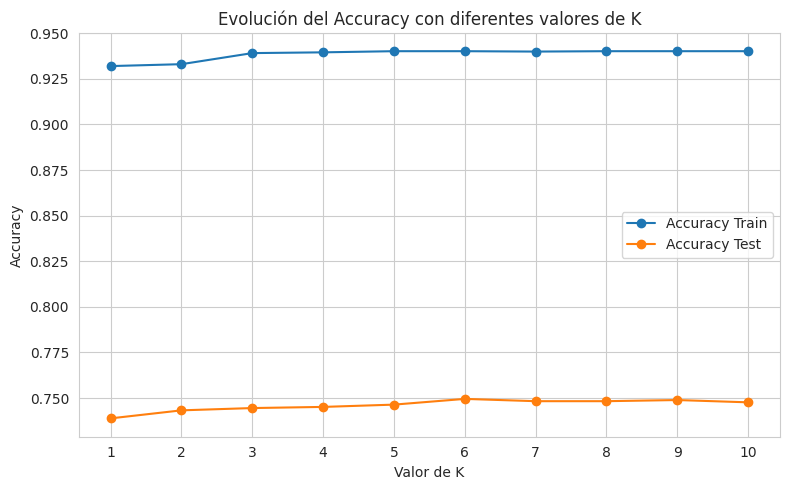

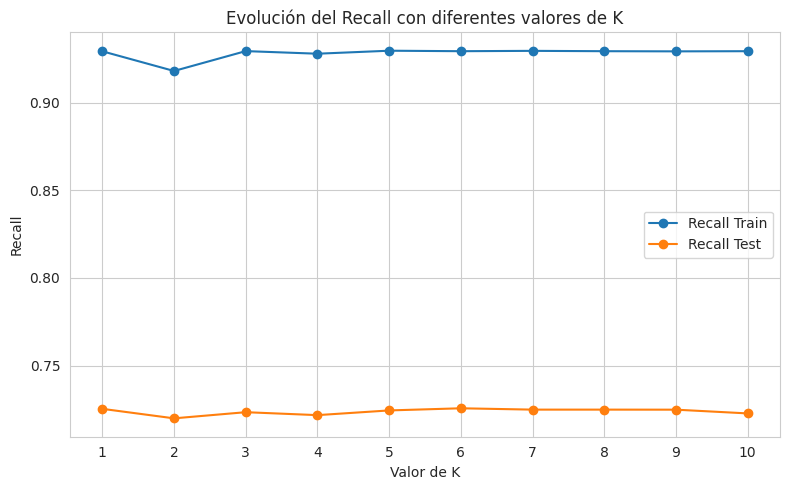

In [ ]:
#Gráfica de Accuracy VS Valores de K
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_train, label='Accuracy Train', marker='o')
plt.plot(k_values, accuracy_test, label='Accuracy Test', marker='o')
plt.xlabel('Valor de K')
plt.ylabel('Accuracy')
plt.title('Evolución del Accuracy con diferentes valores de K')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


#Gráfica de Recall VS Valores de K
plt.figure(figsize=(8, 5))
plt.plot(k_values, recall_train, label='Recall Train', marker='o')
plt.plot(k_values, recall_test, label='Recall Test', marker='o')
plt.xlabel('Valor de K')
plt.ylabel('Recall')
plt.title('Evolución del Recall con diferentes valores de K')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Seleccionamos K igual a 6 ya que es el que mejor Recall nos da como resultado.

In [ ]:
knn = KNeighborsClassifier(6, weights = "distance")
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6, weights='distance')

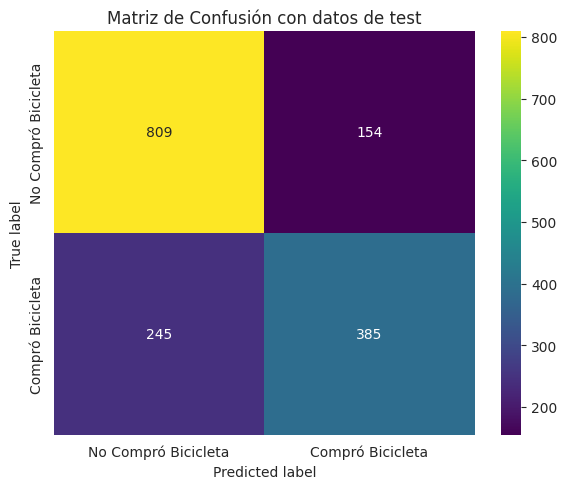

In [ ]:
pred = knn.predict(X_test)

cm = confusion_matrix(y_test, pred)
labels = ["No Compró Bicicleta", "Compró Bicicleta"]

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=labels, yticklabels=labels)

plt.title("Matriz de Confusión con datos de test")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()

#Árboles de decisión

Para árboles debemos usar una base de datos que esté limpiada y codificada (como la que venimos usando) pero no debe estar estandarizada, por lo que tomaremos una base nueva que ya fue limpiada y simplemente haremos la codificación nosotros

In [ ]:
#Primero importamos los métodos necesarios para el modelo de árboles y algunas métricas para evaluarlos
from sklearn.metrics import make_scorer, accuracy_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV


#Luego importamos el DataSet correspondiente
df = pd.read_csv("/content/drive/My Drive/Tps Ciencia de Datos/TPI/Base de datos/data_clientes_limpios.csv", sep=',', encoding='latin-1')

#Y por ultimo los previsualizamos
df.head()

,EstadoCivil,Genero,IngresoAnual,TotalHijos,Educacion,Ocupacion,Propietario,CantAutomoviles,Distancia,Region,Edad,ComproBicicleta
0,C,M,60000.0,0,Licenciatura,Profesional,1,4,'10+ Km.',Sur,38,0
1,S,F,50000.0,2,Licenciatura,'Obrero especializado',1,0,'2-5 Km.',Norte,44,1
2,S,F,60000.0,1,'Estudios de postgrado','Obrero especializado',1,0,'1-2 Km.',Norte,41,0
3,S,F,30000.0,0,'EducaciÃ¯Â¿Â½n secundaria',Obrero,0,1,'2-5 Km.',Centro,42,1
4,S,F,10000.0,2,'EducaciÃ¯Â¿Â½n secundaria',Obrero,1,0,'0-1 Km.',Centro,42,1


Además, al realizar un árbol en Python, las variables categóricas no pueden ser introducidas directamente en un árbol. Por este motivo, vamos a usar un método de codificación "one-hot encoding" que convierte nuestros datos categóricos a un formato numérico antes de construir el árbol de decisión. Para cada nivel único en una variable categórica, one-hot encoding crea una nueva variable binaria (0 o 1) que indica si ese nivel está presente en el registro.

Primeramente vamos a definir la función que va a transformar las variables categóricas en numéricas como mencionamos

In [ ]:
#DEFINIMOS LA FUNCIÓN one_hot_encoding para transformar las variables categóricas
def one_hot_encoding(df, categorical_features, final_columns=None, drop_originals=True):
  """
    Realiza codificación one-hot en las características categóricas especificadas de un DataFrame.
    Esta función aplica la codificación one-hot a la lista dada de características categóricas
    en el DataFrame utilizando el método get_dummies de pandas. Opcionalmente, puede eliminar
    las columnas categóricas originales del DataFrame. Además, permite asegurar que el DataFrame
    resultante incluya un conjunto específico de columnas, rellenando con ceros las que no estén presentes.

    Parámetros:
    - df (pandas.DataFrame): El DataFrame que contiene los datos.
    - categorical_features (list): Lista de columnas categóricas a codificar.
    - final_columns (list): Lista de columnas que deben estar presentes en el DataFrame final.
                            Se agregarán como columnas de ceros si no existen después de la codificación.
    - drop_originals (bool): Indica si se deben eliminar las columnas originales.
                             El valor predeterminado es True.

    Retorna:
    - pandas.DataFrame: DataFrame con las características categóricas codificadas y, opcionalmente,
                        sin las columnas categóricas originales. Incluye todas las columnas especificadas en final_columns.
    """

  # Realizar codificación one-hot
  encoded_features = pd.get_dummies(df[categorical_features], drop_first=True)
  df = pd.concat([df, encoded_features*1], axis=1)

  if drop_originals:
    df = df.drop(categorical_features, axis=1)

  # Asegurar que todas las columnas finales estén presentes
  if final_columns is not None:
    for column in final_columns:
      if column not in df.columns:
        df[column] = 0  # Añadir la columna faltante con ceros

  return df

Ahora vamos a aplicar esta función a nuestro dataframe

In [ ]:
#Aplicamos la función one-hot encoding a nuestro dataframe
vars_cat = df.select_dtypes(include='object').columns
df_cb_encoded = one_hot_encoding(df, vars_cat)

#Previsualizamos el nuevo dataframe
df_cb_encoded.head()

,IngresoAnual,TotalHijos,Propietario,CantAutomoviles,Edad,ComproBicicleta,EstadoCivil_S,EstadoCivil_V,Genero_M,Educacion_'EducaciÃ¯Â¿Â½n secundaria',...,Ocupacion_GestiÃ¯Â¿Â½n,Ocupacion_Obrero,Ocupacion_Profesional,Distancia_'1-2 Km.',Distancia_'10+ Km.',Distancia_'2-5 Km.',Distancia_'5-10 Km.',Region_Noroeste,Region_Norte,Region_Sur
0,60000.0,0,1,4,38,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
1,50000.0,2,1,0,44,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,60000.0,1,1,0,41,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,30000.0,0,0,1,42,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
4,10000.0,2,1,0,42,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
y = df_cb_encoded.ComproBicicleta
x = df_cb_encoded.drop(columns = ['ComproBicicleta'])

Ahora que tenemos las variables categóricas codificadas como numéricas debemos proceder a separar el dataframe en datos de entrenamiento y en datos de prueba, también separando las variables predictoras (X) y la variable predicha (y)

In [ ]:
#Creamos los distintos grupos
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=17, stratify = y)

Ahora debemos determinar cuál será la mejor profundidad para nuestro árbol. Para esto usaremos el método automático "GridSearchCV", el cual hace una validación cruzada para cada profundidad posible entre 1 y 10 y nos devuelve el mejor valor. Además, realizamos una gráfica que nos muestra cómo cambian las métricas tanto para los valores de entrenamiento como para los valores de prueba.

Mejor profundidad según el Accuracy: 10
Mejor profundidad según el Recall: 10


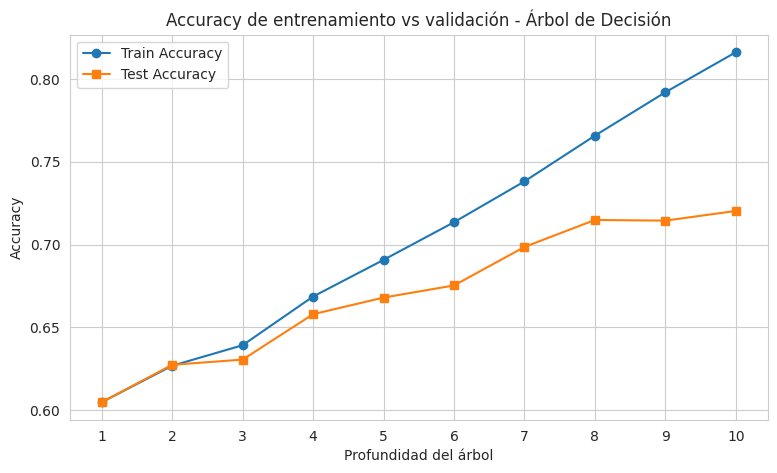

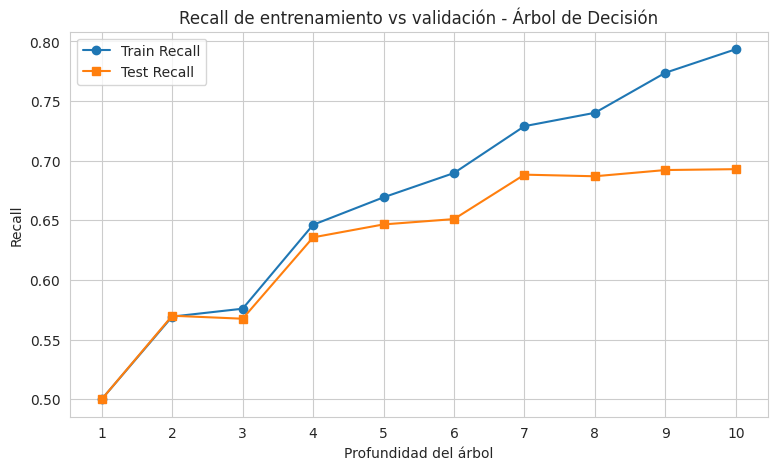

In [ ]:
param_grid = {'max_depth': list(range(1, 11))}
tree = DecisionTreeClassifier(random_state=17)

#Accuracy
grid_acc = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    return_train_score=True
)
grid_acc.fit(X_train, y_train)

print("Mejor profundidad según el Accuracy:", grid_acc.best_params_['max_depth'])
results_acc = pd.DataFrame(grid_acc.cv_results_)

#Recall
grid_rec = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
    scoring='recall_macro',
    cv=5,
    return_train_score=True
)
grid_rec.fit(X_train, y_train)

print("Mejor profundidad según el Recall:", grid_rec.best_params_['max_depth'])
results_rec = pd.DataFrame(grid_rec.cv_results_)


#Gráfico de el Accuracy vs la profundidad del árbol
plt.figure(figsize=(9, 5))
plt.plot(results_acc['param_max_depth'], results_acc['mean_train_score'], label='Train Accuracy', marker='o')
plt.plot(results_acc['param_max_depth'], results_acc['mean_test_score'], label='Test Accuracy', marker='s')
plt.xlabel('Profundidad del árbol')
plt.ylabel('Accuracy')
plt.title('Accuracy de entrenamiento vs validación - Árbol de Decisión')
plt.grid(True)
plt.legend()
plt.xticks(results_acc['param_max_depth'])
plt.show()


#Gráfico de el Recall vs la profundidad del árbol
plt.figure(figsize=(9, 5))
plt.plot(results_rec['param_max_depth'], results_rec['mean_train_score'], label='Train Recall', marker='o')
plt.plot(results_rec['param_max_depth'], results_rec['mean_test_score'], label='Test Recall', marker='s')
plt.xlabel('Profundidad del árbol')
plt.ylabel('Recall')
plt.title('Recall de entrenamiento vs validación - Árbol de Decisión')
plt.grid(True)
plt.legend()
plt.xticks(results_rec['param_max_depth'])
plt.show()


Se puede ver que, a partir de la profundidad 4, el modelo deja de mejorar sus métricas para los valores de prueba, que es lo que nos importa, y sólo mejora las mismas para los valores de entrenamiento, lo que logra un sobreajuste del modelo. Entonces tomamos 4 como la profundidad de nuestro modelo y proseguimos con el modelado.

Accuracy: 0.6597614563716259
Recall (sensibilidad): 0.44126984126984126


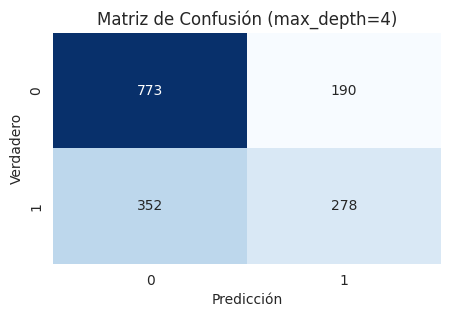

In [ ]:
best_depth = 4
clf_opt = DecisionTreeClassifier(max_depth=best_depth, random_state=17)
clf_opt.fit(X_train, y_train)

y_pred = clf_opt.predict(X_test)

print("Accuracy:",    accuracy_score(y_test, y_pred))
print("Recall (sensibilidad):", recall_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=[0,1])
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Matriz de Confusión (max_depth={best_depth})')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()

Y por último vamos a graficar el árbol de decisión que calculamos. Como la profundidad es bastante alta, primero generamos el gráfico en un archivo PDF y luego lo descargamos para que, con su alta resolución, podamos visualizar correctamente el resultado.

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# Exportar a DOT
dot_data = export_graphviz(clf_opt,
                           out_file=None,
                           feature_names=X_train.columns,
                           class_names=['No compró bicicleta', 'Compró bicicleta'],
                           filled=True,
                           rounded=True,
                           special_characters=True)

# Generar gráfico con Graphviz
graph = graphviz.Source(dot_data)
graph.render("arbol_decision", format='pdf', cleanup=True)

'arbol_decision.pdf'

#Predicción

Ahora tenemos una nueva base de datos: "destinatarios.txt". Este archivo contiene todos los posibles clientes a los que les vamos a mandar un mail (o no) para que compren una bicicleta. ¿Cómo elegimos a quiénes les enviamos? Vamos a usar nuestro mejor modelo (KNN con K=6) ya entrenado para predecir si esas personas comprarían o no una bicicleta. Para esto, primero debemos crear nuestro nuevo dataframe

In [ ]:
#importamos el archivo csv de clientes

df_destinatarios = pd.read_csv("/content/drive/My Drive/Tps Ciencia de Datos/TPI/Base de datos/Destinatarios.txt", sep=',', encoding='latin-1')
df_destinatarios_mod = df_destinatarios.drop(columns=['Nombre', 'Apellido', 'FechaNacimiento', 'Email', 'Direccion', 'Telefono', 'IdCiudad', 'CantHijosEnCasa'])
df_destinatarios_mod.head()

,EstadoCivil,Genero,IngresoAnual,TotalHijos,Educacion,Ocupacion,Propietario,CantAutomoviles,Distancia,Region,Edad
0,S,F,10000,1,'Educación secundaria',Obrero,0,2,'0-1 Km.',Centro,43
1,S,M,100000,3,Licenciatura,Gestión,1,3,'2-5 Km.',Norte,32
2,C,F,20000,4,'Educación secundaria',Obrero,1,2,'0-1 Km.',Centro,34
3,C,F,80000,3,Licenciatura,'Obrero especializado',1,3,'10+ Km.',Norte,48
4,C,M,30000,1,'Estudios de postgrado',Administrativo,1,0,'0-1 Km.',Centro,75


Ahora vamos a codificar las variables categóricas para poder trabajarlas correctamente

In [ ]:
#Transformamos variables categóricas en numéricas con one_hot_encoding porque no podemos introducir datos cualitativos
#Primero definimos la función
def one_hot_encoding(df, categorical_features, final_columns=None, drop_originals=True):

  # Realizar codificación one-hot
  encoded_features = pd.get_dummies(df[categorical_features], drop_first=True)
  df = pd.concat([df, encoded_features*1], axis=1)

  if drop_originals:
    df = df.drop(categorical_features, axis=1)

  # Asegurar que todas las columnas finales estén presentes
  if final_columns is not None:
    for column in final_columns:
      if column not in df.columns:
        df[column] = 0  # Añadir la columna faltante con ceros

  return df

#Aplicamos one hot encoding a nuestro dataframe
vars_cat = df_destinatarios_mod.select_dtypes(include='object').columns
df_destinatarios_encoded = one_hot_encoding(df_destinatarios_mod, vars_cat)
df_destinatarios_encoded.head()

,IngresoAnual,TotalHijos,Propietario,CantAutomoviles,Edad,EstadoCivil_S,Genero_M,Educacion_'Educación secundaria',Educacion_'Estudios de postgrado',Educacion_'Estudios universitarios (en curso)',...,Ocupacion_Administrativo,Ocupacion_Gestión,Ocupacion_Obrero,Ocupacion_Profesional,Distancia_'1-2 Km.',Distancia_'10+ Km.',Distancia_'2-5 Km.',Distancia_'5-10 Km.',Region_Norte,Region_Sur
0,10000,1,0,2,43,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,100000,3,1,3,32,1,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
2,20000,4,1,2,34,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,80000,3,1,3,48,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,30000,1,1,0,75,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0


Y también vamos a reescribir algunas de estas columnas para que se vean mejor

In [ ]:
df_destinatarios_encoded = df_destinatarios_encoded.rename(columns={"Distancia_'1-2 Km.'": 'Distancia1-2'})
df_destinatarios_encoded = df_destinatarios_encoded.rename(columns={"Distancia_'10+ Km.'": 'Distancia10+'})
df_destinatarios_encoded = df_destinatarios_encoded.rename(columns={"Distancia_'2-5 Km.'": 'Distancia2-5'})
df_destinatarios_encoded = df_destinatarios_encoded.rename(columns={"Distancia_'5-10 Km.'": 'Distancia5-10'})
df_destinatarios_encoded = df_destinatarios_encoded.rename(columns={"Educacion_'Educaciï¿½n secundaria'": 'EduSecu'})
df_destinatarios_encoded = df_destinatarios_encoded.rename(columns={"Educacion_'Estudios de postgrado'": 'Educacion_postgrado'})
df_destinatarios_encoded = df_destinatarios_encoded.rename(columns={"Educacion_'Estudios universitarios (en curso)'": 'Educacion_estudios_universitarios'})
df_destinatarios_encoded = df_destinatarios_encoded.rename(columns={"Ocupacion_Gestiï¿½n": 'Ocupacion_gestion'})

Por último vamos a estandarizar las variables para poder trabajar con KNN

In [ ]:
df_destinatarios_encoded["EstadoCivil_V"] = 0
df_destinatarios_encoded["Region_Noroeste"] = 0

list_x = [c for c in df_destinatarios_encoded.columns]

scaler = StandardScaler()
scaler.fit(df_destinatarios_encoded[list_x])

df_predict = scaler.transform(df_destinatarios_encoded)

Ahora vamos a predecir sobre este nuevo data frame

In [ ]:
for p in range(0,len(df_predict),1):
  prediction = knn.predict(df_predict)[p]
  df_destinatarios.loc[p, "Enviar_Mail"] = prediction

df_destinatarios


,IdCiudad,Nombre,Apellido,FechaNacimiento,EstadoCivil,Genero,Email,IngresoAnual,TotalHijos,CantHijosEnCasa,Educacion,Ocupacion,Propietario,CantAutomoviles,Direccion,Telefono,Distancia,Region,Edad,Enviar_Mail
0,184,Ashlee,Xie,1970-01-27,S,F,ashlee10@mineriadedatos.com.ar,10000,1,1,'Educación secundaria',Obrero,0,2,'92 rue Ste-Honoré','500 555-0159','0-1 Km.',Centro,43,1.0
1,383,Marcus,Campbell,1980-05-23,S,M,marcus44@mineriadedatos.com.ar,100000,3,0,Licenciatura,Gestión,1,3,'8819 Camino Norte',911-555-0178,'2-5 Km.',Norte,32,0.0
2,220,Monique,Vazquez,1979-02-16,C,F,monique11@mineriadedatos.com.ar,20000,4,4,'Educación secundaria',Obrero,1,2,'2 rue Lafayette','500 555-0129','0-1 Km.',Centro,34,0.0
3,311,Adriana,Malhotra,1965-04-24,C,F,adriana5@mineriadedatos.com.ar,80000,3,3,Licenciatura,'Obrero especializado',1,3,'1944 Serene Court',911-555-0122,'10+ Km.',Norte,48,0.0
4,258,Johnny,Goel,1937-12-02,C,M,johnny21@mineriadedatos.com.ar,30000,1,0,'Estudios de postgrado',Administrativo,1,0,'5869 Clayton Road','500 555-0155','0-1 Km.',Centro,75,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,634,Brandon,Zhang,1962-02-11,C,M,brandon20@mineriadedatos.com.ar,60000,1,0,'Estudios universitarios (en curso)','Obrero especializado',1,1,'8461 Everett Ct',822-555-0128,'2-5 Km.',Norte,51,0.0
1465,632,Brooke,Cook,1951-08-11,C,F,brooke19@mineriadedatos.com.ar,60000,2,1,'Educación secundaria',Profesional,1,2,'8519 Crivello Ave.',161-555-0151,'10+ Km.',Norte,61,0.0
1466,277,Bruce,Sara,1972-07-04,S,M,bruce9@mineriadedatos.com.ar,30000,0,0,'Educación secundaria',Obrero,0,1,'5237 Babel Lane','500 555-0144','1-2 Km.',Centro,40,0.0
1467,343,Benjamin,Taylor,1967-07-09,S,M,benjamin43@mineriadedatos.com.ar,60000,0,0,'Estudios de postgrado',Profesional,0,1,'2078 Jennifer Way',571-555-0135,'0-1 Km.',Norte,45,0.0


Por último vamos a descargar este DataFrame resultante con la columna nueva "Enviar Mail", que tendrá un 0 o un 1 dependiendo de la predicción, como un Excel

In [ ]:
from google.colab import files

df_destinatarios.to_excel("df_destinatarios.xlsx", index=False)
files.download("df_destinatarios.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Tranformación archivo destinatarios


In [ ]:
import pandas as pd
from google.colab import drive, files

# Montar Google Drive
drive.mount('/content/drive')

# Cargar el archivo Excel
ruta = "/content/drive/My Drive/Tps Ciencia de Datos/TPI/Base de datos/Destinatarios_solo_1.xlsx"
df_destinatarios = pd.read_excel(ruta, engine='openpyxl')

# Mostrar primeras filas
df_destinatarios.head()

# Guardar como CSV
df_destinatarios.to_csv("df_destinatarios_1.csv", index=False, encoding='utf-8')

# Descargar
files.download("df_destinatarios_1.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Análisis de Componentes Principales
El gerente de ventas nos solicitó que recomendemos 3 ciudades que posean características similares a Buenos Aires para explorar la oportunidad de iniciar nuevos mercados. Para ello haremos un Análisis de Componentes Principales, con el objetivo de reducir la cantidad de variables con las que compararemos las distintas ciudades a Buenos Aires para encontrar los mejores candidatos. Primero trabajamos sobre la base de datos de mercados posibles (que estaba basada en ciudades) para poder trabajar sobre las mismas.

Entonces comenzamos importando el documento y los métodos necesarios para trabajar

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

#importamos archivo aclarando la hoja que necesitamos dentro del .xls
df = pd.read_excel('/content/drive/My Drive/Tps Ciencia de Datos/TPI/Base de datos/datosMercados.xlsx', sheet_name='RapidMiner Data')
df.head()

Mounted at /content/drive


,Horas de trabajo promedio [hs/año],Días de vacaciones promedio (por año),Inflación 2006,Inflación 2007,Inflación 2008,Inflación 2009,Inflación 2010,Inflación 2011,Alquiler departamento 3 ambientes [USD por mes],Contribución al seguro social (%),Sueldo promedio maestro de escuela primaria [USD por año],Sueldo promedio chofer colectivo [USD por año],Sueldo promedio mecánico de automóviles [USD por año],Sueldo promedio arquitecto [USD por año],Sueldo promedio cocinero [USD por año],Sueldo promedio ingeniero [USD por año],Sueldo promedio secretaria [USD por año],Sueldo promedio vendedor [USD por año],Sueldo promedio analista financiero [USD por año],Ciudad
0,1755,24,1.651,1.590,2.205,0.974,0.930,2.477,790.0,30,48400,39200,26300,30200,39800,64600,40300,31100,66700,Amsterdam
1,1822,22,3.314,2.991,4.236,1.349,4.701,3.100,323.5,24,26200,23300,18500,17100,24200,34100,21000,17700,34400,Athens
2,1852,20,3.362,2.377,3.959,2.116,2.303,4.027,666.5,17,35700,31500,36500,28500,31100,56300,33400,26900,64900,Auckland
3,2312,7,4.637,2.242,5.468,-0.845,3.272,3.807,466.0,5,8300,8400,11100,3000,10900,24600,7800,6000,19400,Bangkok
4,1760,29,3.563,2.844,4.130,-0.238,2.043,3.052,543.5,23,41300,34100,29100,29800,32100,43100,28900,25500,58300,Barcelona


Ahora describimos los datos para tener una idea general de sus distribuciones

In [ ]:
df.describe()

,Horas de trabajo promedio [hs/año],Días de vacaciones promedio (por año),Inflación 2006,Inflación 2007,Inflación 2008,Inflación 2009,Inflación 2010,Inflación 2011,Alquiler departamento 3 ambientes [USD por mes],Contribución al seguro social (%),Sueldo promedio maestro de escuela primaria [USD por año],Sueldo promedio chofer colectivo [USD por año],Sueldo promedio mecánico de automóviles [USD por año],Sueldo promedio arquitecto [USD por año],Sueldo promedio cocinero [USD por año],Sueldo promedio ingeniero [USD por año],Sueldo promedio secretaria [USD por año],Sueldo promedio vendedor [USD por año],Sueldo promedio analista financiero [USD por año]
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,1914.328767,19.931507,3.981945,4.152589,6.410493,2.719110,3.275466,4.248274,783.006849,20.808219,33106.849315,26394.520548,23791.780822,20949.315068,34554.794521,46149.315068,26046.575342,19505.479452,59950.684932
std,187.349499,6.351572,3.194715,3.506182,4.946987,4.799518,4.096243,3.574746,437.889497,8.761750,26639.837174,20892.887482,17448.183234,17434.967445,19643.001589,28259.458217,17188.570833,13578.126716,38839.227461
min,1557.000000,6.000000,0.300000,0.000000,1.396000,-4.865000,-2.433000,-0.283000,226.500000,0.000000,1600.000000,1400.000000,1900.000000,1300.000000,4400.000000,6700.000000,3800.000000,2700.000000,9700.000000
25%,1786.000000,15.000000,2.004000,2.038000,3.500000,0.103000,1.639000,2.757000,459.500000,16.000000,10600.000000,10000.000000,10900.000000,7000.000000,17100.000000,22800.000000,13200.000000,8200.000000,27800.000000
50%,1853.000000,22.000000,3.222000,2.844000,4.377000,1.034000,2.270000,3.403000,666.500000,21.000000,29000.000000,21900.000000,18900.000000,14600.000000,33500.000000,37600.000000,21000.000000,15000.000000,58700.000000
75%,2012.000000,25.000000,4.296000,5.544000,8.349000,4.164000,3.339000,4.999000,964.500000,27.000000,51200.000000,39200.000000,37300.000000,29500.000000,48800.000000,69200.000000,40300.000000,28200.000000,83400.000000
max,2375.000000,30.000000,14.455000,18.703000,30.370000,27.081000,28.187000,26.090000,2149.500000,42.000000,113300.000000,93900.000000,78200.000000,69300.000000,85500.000000,115700.000000,71100.000000,61400.000000,171100.000000


Y por último verificamos que no haya nulos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 20 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Horas de trabajo promedio [hs/año]                         73 non-null     int64  
 1   Días de vacaciones promedio (por año)                      73 non-null     int64  
 2   Inflación 2006                                             73 non-null     float64
 3   Inflación 2007                                             73 non-null     float64
 4   Inflación 2008                                             73 non-null     float64
 5   Inflación 2009                                             73 non-null     float64
 6   Inflación 2010                                             73 non-null     float64
 7   Inflación 2011                                             73 non-null     float64
 8   Alquiler dep

Ahora por último verificamos que las variables estén correladas (ignoramos la columna Ciudad)

In [ ]:
df.drop(columns="Ciudad").corr()

,Horas de trabajo promedio [hs/año],Días de vacaciones promedio (por año),Inflación 2006,Inflación 2007,Inflación 2008,Inflación 2009,Inflación 2010,Inflación 2011,Alquiler departamento 3 ambientes [USD por mes],Contribución al seguro social (%),Sueldo promedio maestro de escuela primaria [USD por año],Sueldo promedio chofer colectivo [USD por año],Sueldo promedio mecánico de automóviles [USD por año],Sueldo promedio arquitecto [USD por año],Sueldo promedio cocinero [USD por año],Sueldo promedio ingeniero [USD por año],Sueldo promedio secretaria [USD por año],Sueldo promedio vendedor [USD por año],Sueldo promedio analista financiero [USD por año]
Horas de trabajo promedio [hs/año],1.000000,-0.637325,0.290236,0.271264,0.222761,0.245836,0.224775,0.222369,0.041583,-0.574618,-0.323434,-0.400502,-0.489259,-0.423277,-0.201248,-0.325774,-0.410865,-0.436925,-0.319541
Días de vacaciones promedio (por año),-0.637325,1.000000,-0.057109,-0.021936,-0.026799,-0.058570,-0.159257,-0.133658,-0.060648,0.306484,0.117538,0.169015,0.212808,0.130580,0.084301,0.112358,0.188528,0.212149,0.151385
Inflación 2006,0.290236,-0.057109,1.000000,0.827713,0.781226,0.591058,0.533995,0.645032,-0.079133,-0.417866,-0.512049,-0.492420,-0.490220,-0.493942,-0.437509,-0.464857,-0.518296,-0.511603,-0.531571
Inflación 2007,0.271264,-0.021936,0.827713,1.000000,0.916738,0.702062,0.622062,0.693079,-0.046334,-0.407760,-0.503003,-0.513494,-0.518014,-0.532208,-0.375963,-0.465467,-0.528947,-0.525028,-0.533373
Inflación 2008,0.222761,-0.026799,0.781226,0.916738,1.000000,0.766669,0.654494,0.729872,-0.078622,-0.369552,-0.527958,-0.520040,-0.494264,-0.513406,-0.432466,-0.496732,-0.540541,-0.531162,-0.521225
Inflación 2009,0.245836,-0.058570,0.591058,0.702062,0.766669,1.000000,0.893582,0.864838,-0.148803,-0.252843,-0.464825,-0.443417,-0.422776,-0.415000,-0.311919,-0.431259,-0.465962,-0.429462,-0.447468
Inflación 2010,0.224775,-0.159257,0.533995,0.622062,0.654494,0.893582,1.000000,0.892931,-0.101055,-0.289875,-0.387740,-0.377618,-0.364782,-0.355045,-0.262992,-0.378215,-0.404810,-0.361846,-0.414832
Inflación 2011,0.222369,-0.133658,0.645032,0.693079,0.729872,0.864838,0.892931,1.000000,-0.068907,-0.259415,-0.445835,-0.445295,-0.437758,-0.422028,-0.333272,-0.429824,-0.469400,-0.445118,-0.476799
Alquiler departamento 3 ambientes [USD por mes],0.041583,-0.060648,-0.079133,-0.046334,-0.078622,-0.148803,-0.101055,-0.068907,1.000000,-0.038920,0.556419,0.483144,0.460849,0.495335,0.597708,0.596809,0.526261,0.509480,0.556353
Contribución al seguro social (%),-0.574618,0.306484,-0.417866,-0.407760,-0.369552,-0.252843,-0.289875,-0.259415,-0.038920,1.000000,0.382836,0.454608,0.543356,0.528885,0.391251,0.416410,0.511784,0.508747,0.386388


Vemos que tenemos valores altos en varias variables por lo que avanzamos con el análisis de componentes principales.
Primero tenemos que estandarizar los datos para poder trabajarlos

In [ ]:
# Estandarizamos los datos

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns = "Ciudad"))

ciudades = df["Ciudad"]
pd.DataFrame(df_scaled, columns=['Horas de trabajo promedio', 'Días de vacaciones promedio', 'Inflación 2006', 'Inflación 2007','Inflación 2008', 'Inflación 2009','Inflación 2010', 'Inflación 2011','Alquiler departamento 3 ambientes', 'Contribución al seguro social','Sueldo promedio maestro de escuela primaria', 'Sueldo promedio chofer colectivo', 'Sueldo promedio mecánico de automóviles', 'Sueldo promedio arquitecto', 'Sueldo promedio cocinero', 'Sueldo promedio ingeniero', 'Sueldo promedio secretaria', 'Sueldo promedio vendedor', 'Sueldo promedio analista financiero'])

,Horas de trabajo promedio,Días de vacaciones promedio,Inflación 2006,Inflación 2007,Inflación 2008,Inflación 2009,Inflación 2010,Inflación 2011,Alquiler departamento 3 ambientes,Contribución al seguro social,Sueldo promedio maestro de escuela primaria,Sueldo promedio chofer colectivo,Sueldo promedio mecánico de automóviles,Sueldo promedio arquitecto,Sueldo promedio cocinero,Sueldo promedio ingeniero,Sueldo promedio secretaria,Sueldo promedio vendedor,Sueldo promedio analista financiero
0,-0.856321,0.644982,-0.734675,-0.735935,-0.855995,-0.366117,-0.576552,-0.498925,0.016081,1.056341,0.578044,0.617153,0.144747,0.534254,0.268875,0.657421,0.834977,0.859821,0.174978
1,-0.496226,0.327920,-0.210525,-0.333590,-0.442601,-0.287444,0.350419,-0.323441,-1.056629,0.366807,-0.261062,-0.149139,-0.305384,-0.222309,-0.530797,-0.429332,-0.295632,-0.133890,-0.662410
2,-0.334989,0.010858,-0.195396,-0.509921,-0.498982,-0.126530,-0.239047,-0.062328,-0.267906,-0.437649,0.098015,0.246056,0.733381,0.436074,-0.177096,0.361682,0.430770,0.548359,0.128313
3,2.137307,-2.050044,0.206462,-0.548691,-0.191837,-0.747737,-0.000852,-0.124296,-0.728953,-1.816717,-0.937638,-0.867235,-0.732432,-1.036626,-1.212569,-0.767830,-1.068899,-1.001533,-1.051291
4,-0.829449,1.437637,-0.132044,-0.375806,-0.464176,-0.620390,-0.302959,-0.336962,-0.550742,0.251884,0.309681,0.371361,0.306333,0.511153,-0.125835,-0.108651,0.167156,0.444539,-0.042795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,-0.361862,-0.940327,-0.619003,-0.582866,-0.819358,-0.507520,-0.368592,-0.382312,0.521967,0.711574,1.882059,0.496667,0.548712,1.458301,0.945520,1.377173,0.014846,0.629933,0.379789
69,-0.689710,0.803513,-0.723643,-0.559891,-0.648789,-0.486331,-0.389732,-0.182603,-0.163279,0.941418,0.438193,0.795472,0.594879,0.493827,0.740476,0.842704,1.397353,0.778248,0.325345
70,-0.673587,0.644982,-0.061128,0.465069,0.962247,0.303133,-0.512640,-0.035005,-1.234839,0.251884,-0.854483,-0.684097,-0.570847,-0.643906,-0.648698,-1.052880,-0.916589,-0.964454,-0.556116
71,-0.657463,0.486451,-0.929458,-0.476608,-0.446875,0.153338,-0.187180,0.005556,-0.416223,0.826496,-0.801567,-0.790124,-0.645869,-0.649681,-0.720463,-1.006559,-0.840434,-0.630745,-0.908701


Ahora proseguimos con ACP

In [ ]:
# importamos el modulo para aplicar PCA de sklearn

from sklearn.decomposition import PCA


# Creamos una instancia del modelo PCA con todas las componentes principales.
# van a ser 19 porque el minimo entre la cantidad de filas (73) y cantidad de columnas (19) es 19.
pca = PCA(n_components=19)

# Ajustamos el modelo a los datos.
pca.fit(df_scaled)

# Transformamos los datos.
df_pca = pca.transform(df_scaled)

# Convertimos los datos transformados en un DataFrame de Pandas.
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6','PC7', 'PC8','PC9', 'PC10', 'PC11', 'PC12','PC13', 'PC14','PC15', 'PC16','PC17', 'PC18','PC19'])

# Mostramos las primeras filas del DataFrame.
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,2.410148,-0.566164,-0.953686,-0.255394,-0.036107,0.165988,0.179655,0.306589,-0.253326,0.191185,-0.029598,0.344792,0.006994,-0.247097,-0.394906,0.037511,0.083245,-0.206562,0.200178
1,-0.536807,-1.192112,-0.982989,-0.551481,-0.055765,-0.391125,-0.024213,0.163040,0.059946,0.137282,-0.319421,0.212484,0.004913,-0.248963,0.248845,-0.028827,0.207247,-0.086719,0.042126
2,1.067349,-0.198439,-0.059060,-0.155610,-0.192672,-0.884357,0.101490,0.164214,0.094770,-0.463413,0.067076,0.057631,0.056270,0.170386,-0.218726,-0.002802,-0.189567,0.118966,-0.196080
3,-2.911558,-2.000485,2.817629,-0.446340,0.201107,-0.951450,0.000521,0.270173,0.039857,-0.212831,0.040095,-0.026978,0.182460,0.269856,0.189652,-0.161688,0.313792,0.276302,-0.286968
4,1.141522,-0.681770,-1.454188,0.451464,-0.320320,-0.496850,-0.191676,0.429815,0.024585,0.069850,-0.315657,-0.087297,0.020913,0.234876,0.158003,0.070920,0.118438,-0.243325,0.030872


Por las dudas chequeamos que tengamos 73 filas y 19 columnas

In [ ]:
#vemos filas y columnas
df_pca.shape

(73, 19)

Podemos ver que nuestro dataframe ahora está formado por nuevas variables (CP) con la misma cantidad de filas que los datos originales. Ahora analizamos el porcentaje de varianza explicada por cada componente

In [ ]:
# Obtenemos el porcentaje de varianza explicada por cada componente principal.
pca.explained_variance_ratio_

array([0.56510471, 0.14951551, 0.09550247, 0.0503088 , 0.02779676,
       0.02227795, 0.01843976, 0.01296373, 0.01114075, 0.01057812,
       0.00777063, 0.00736409, 0.00504308, 0.00449621, 0.00320113,
       0.00291675, 0.00239777, 0.00210382, 0.00107796])

Podemos observar que la primera componente explica el 47% de la varianza, la segunda el 14%, la tercera el 9% y así sucesivamente.

Ahora describimos nuestro modelo obtenido mediante:

-Autovectores de cada CP: son los coeficientes que indican la combinación lineal con las variables originales.

-Autovalores de cada CP: indican la varianza que concentra de cada CP

In [ ]:
import numpy as np
loadings = pca.components_.T  # Transponer para alinear con las variables originales en las filas

features = ['Horas de trabajo promedio', 'Días de vacaciones promedio', 'Inflación 2006', 'Inflación 2007','Inflación 2008', 'Inflación 2009','Inflación 2010', 'Inflación 2011','Alquiler departamento 3 ambientes', 'Contribución al seguro social','Sueldo promedio maestro de escuela primaria', 'Sueldo promedio chofer colectivo', 'Sueldo promedio mecánico de automóviles', 'Sueldo promedio arquitecto', 'Sueldo promedio cocinero', 'Sueldo promedio ingeniero', 'Sueldo promedio secretaria', 'Sueldo promedio vendedor', 'Sueldo promedio analista financiero']

# Crear el DataFrame de cargas
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])], index=features)

loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
Horas de trabajo promedio,-0.138907,0.009622,0.581985,-0.076529,0.051220,0.164439,-0.501165,0.395880,-0.359705,-0.044553,0.037836,-0.064768,0.086681,0.147063,0.148231,-0.063283,0.057736,-0.024962,-0.049232
Días de vacaciones promedio,0.061849,0.006222,-0.576282,0.433168,-0.447402,0.118985,-0.281855,0.337917,-0.174835,-0.014712,-0.010460,-0.000913,-0.005357,0.135174,0.114095,-0.048140,0.059294,-0.009727,0.017443
Inflación 2006,-0.209684,0.267083,-0.024061,0.324826,0.420252,-0.190242,-0.083024,0.465843,0.475470,0.039031,0.136362,-0.111421,-0.127343,-0.200094,-0.006986,0.119651,0.074972,0.071307,0.044425
Inflación 2007,-0.217296,0.320410,-0.053096,0.298039,0.258408,0.057703,-0.156011,-0.277563,-0.103197,0.099046,-0.249969,0.307547,0.194579,-0.026784,0.150691,-0.131116,-0.490034,-0.292901,-0.071115
Inflación 2008,-0.220008,0.324135,-0.095369,0.204372,0.226727,0.017747,-0.047053,-0.448459,-0.297583,-0.117770,0.101232,-0.204638,0.021279,0.194928,-0.031585,0.049670,0.558131,0.168702,0.064698
Inflación 2009,-0.198688,0.367398,-0.111006,-0.278848,-0.197152,0.046969,-0.195404,-0.035852,-0.213229,-0.171362,0.175739,-0.097757,-0.420849,-0.297022,-0.379567,0.153945,-0.323112,0.044561,0.012459
Inflación 2010,-0.180833,0.377506,-0.052468,-0.387338,-0.294971,-0.137727,0.048995,0.046339,0.100393,-0.008348,-0.154495,0.128681,0.101389,-0.307300,0.558333,-0.116777,0.273903,-0.007768,0.075735
Inflación 2011,-0.199805,0.371621,-0.076200,-0.267825,-0.119513,0.027481,0.233122,0.217339,0.136575,0.229666,0.120538,-0.019686,0.296852,0.606557,-0.260580,-0.042630,-0.091384,-0.028776,-0.081071
Alquiler departamento 3 ambientes,0.143388,0.301494,0.310483,0.352760,-0.164446,0.402240,0.598160,0.151868,-0.169241,-0.023705,-0.048945,-0.152747,-0.079393,-0.177134,0.049262,-0.026522,-0.037588,0.001360,-0.029085
Contribución al seguro social,0.168320,-0.026206,-0.400003,-0.356814,0.500404,0.548691,0.032430,0.162211,-0.158691,0.166252,0.094131,-0.042861,0.019967,-0.123789,0.149491,0.004781,0.038040,-0.039438,-0.014743


Esta matriz indica la contribución de cada variable original al componente principal correspondiente.

Magnitud de los valores : Una carga alta (en valor absoluto) significa que la variable correspondiente tiene una fuerte influencia sobre el componente principal. Una carga cercana a cero significa que la variable tiene poca o ninguna influencia sobre ese componente. Signo de los valores: Una carga positiva indica que la variable contribuye positivamente al componente principal, es decir, que la variable y el componente aumentan juntos. Una carga negativa indica que la variable contribuye negativamente, es decir, que la variable aumenta mientras el componente disminuye, o viceversa.

Si ahora evaluamos las componentes con cada registro

In [ ]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,2.410148,-0.566164,-0.953686,-0.255394,-0.036107,0.165988,0.179655,0.306589,-0.253326,0.191185,-0.029598,0.344792,0.006994,-0.247097,-0.394906,0.037511,0.083245,-0.206562,0.200178
1,-0.536807,-1.192112,-0.982989,-0.551481,-0.055765,-0.391125,-0.024213,0.163040,0.059946,0.137282,-0.319421,0.212484,0.004913,-0.248963,0.248845,-0.028827,0.207247,-0.086719,0.042126
2,1.067349,-0.198439,-0.059060,-0.155610,-0.192672,-0.884357,0.101490,0.164214,0.094770,-0.463413,0.067076,0.057631,0.056270,0.170386,-0.218726,-0.002802,-0.189567,0.118966,-0.196080
3,-2.911558,-2.000485,2.817629,-0.446340,0.201107,-0.951450,0.000521,0.270173,0.039857,-0.212831,0.040095,-0.026978,0.182460,0.269856,0.189652,-0.161688,0.313792,0.276302,-0.286968
4,1.141522,-0.681770,-1.454188,0.451464,-0.320320,-0.496850,-0.191676,0.429815,0.024585,0.069850,-0.315657,-0.087297,0.020913,0.234876,0.158003,0.070920,0.118438,-0.243325,0.030872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2.970116,0.253080,0.747550,-0.692265,0.489596,0.002346,0.470566,-0.220356,0.124324,0.637556,-0.085185,0.661514,-0.958722,0.406999,0.331284,0.823528,-0.014874,-0.312353,0.074235
69,2.662418,-0.065100,-0.973544,-0.268986,-0.056987,0.127662,-0.214816,0.265932,-0.101208,0.070995,-0.145116,0.401924,0.417337,0.052277,-0.378139,-0.364703,0.069476,0.265351,0.289662
70,-2.154594,-1.086887,-1.541654,0.301354,0.259671,0.232657,-0.297370,-0.822825,-0.148275,-0.046322,0.043020,-0.361022,-0.173735,0.330511,-0.171567,0.033802,-0.031573,0.043080,0.009558
71,-1.314742,-1.771386,-1.249286,-0.648958,-0.451913,0.795269,0.680773,0.020445,-0.357554,0.031533,-0.235593,-0.132506,-0.147079,-0.072284,-0.096540,0.094127,-0.177789,-0.052644,-0.112436


Podemos ver que, por ejemplo para Argentina que era nuestro segundo ejemplo en el dataset original, el valor en la PC1 es 3.640930

Resulta de hacer: Valor en PC1= c1 * X1 + c2 * X2 + .... c19 * X19

Ahora vamos a calcular los autovalores

In [ ]:
# CALCULO DE LOS AUTOVALORES O EIGENVALUES (VARIANZA DE CADA COMPONENTE)
df_varianza = pd.DataFrame(data={'Componente': range(1, 20), 'Varianza': pca.explained_variance_})
df_varianza

,Componente,Varianza
0,1,10.886114
1,2,2.880250
2,3,1.839749
3,4,0.969143
4,5,0.535474
5,6,0.429160
6,7,0.355221
7,8,0.249732
8,9,0.214614
9,10,0.203776


Y, para verlo en porcentajes:

In [ ]:
# VARIANZA DE CADA COMPONENTE PORCENTUALMENTE: VAR(CPi)/ VARIANZA TOTAL
df_varianza_ratio = pd.DataFrame(data={'Componente': range(1, 20), '% Varianza explicada': pca.explained_variance_ratio_ * 100})
df_varianza_ratio

,Componente,% Varianza explicada
0,1,56.510471
1,2,14.951551
2,3,9.550247
3,4,5.030880
4,5,2.779676
5,6,2.227795
6,7,1.843976
7,8,1.296373
8,9,1.114075
9,10,1.057812


Ahora hagamos un gráfico de sedimentación para podes visualizar esta varianza explicada

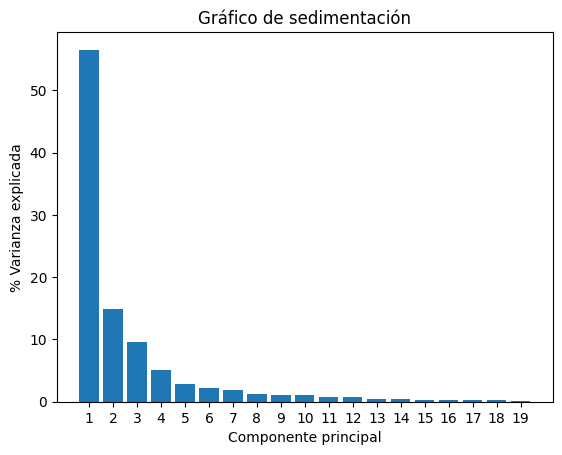

In [ ]:
import matplotlib.pyplot as plt

# Creamos un DataFrame con la varianza explicada por cada componente principal.
df_varianza = pd.DataFrame(data={'Componente': range(1, 20), 'Varianza explicada': pca.explained_variance_ratio_ * 100})

# Creamos un gráfico de barras.
plt.bar(df_varianza['Componente'], df_varianza['Varianza explicada'])

plt.xticks(ticks=range(1, 20, 1))  # de 1 a 19, con paso de 1

# Añadimos etiquetas y título al gráfico.
plt.xlabel('Componente principal')
plt.ylabel('% Varianza explicada')
plt.title('Gráfico de sedimentación')

# Mostramos el gráfico.
plt.show()

A partir de las varianzas de cada componente, podemos ver que con 3 CP conservamos el 81.1% de la variabilidad original de los datos. Esto nos permitirá representar las ciudades en 3 dimensiones.

Proseguiremos ahora a graficar estas componentes cruzándolas para ver su relación

In [ ]:
# Creamos un DataFrame para cada combinación posible y le agregamos la etiqueta de paises
df_pca_1_2 = df_pca[['PC1', 'PC2']]
df_pca_1_2["Ciudad"] = ciudades
df_pca_1_2["Es_BsAs"] = df_pca_1_2["Ciudad"].apply(lambda x: "Buenos Aires" if x == "Buenos Aires" else "Otro")
df_pca_1_3 = df_pca[['PC1', 'PC3']]
df_pca_1_3["Ciudad"] = ciudades
df_pca_1_3["Es_BsAs"] = df_pca_1_3["Ciudad"].apply(lambda x: "Buenos Aires" if x == "Buenos Aires" else "Otro")

df_pca_2_3 = df_pca[['PC2', 'PC3']]
df_pca_2_3["Ciudad"] = ciudades
df_pca_2_3["Es_BsAs"] = df_pca_2_3["Ciudad"].apply(lambda x: "Buenos Aires" if x == "Buenos Aires" else "Otro")

/tmp/ipython-input-14-2446335195.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pca_1_2["Ciudad"] = ciudades
/tmp/ipython-input-14-2446335195.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pca_1_2["Es_BsAs"] = df_pca_1_2["Ciudad"].apply(lambda x: "Buenos Aires" if x == "Buenos Aires" else "Otro")
/tmp/ipython-input-14-2446335195.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

A partir de acá se podrán ver los gráficos de dispersión para cada combinación posible de los 3 componentes

In [ ]:
#lo hacemos con plotly para poder ver mejor que ciudad es cada punto
import plotly.express as px

#Componente 1 VS Componente 2
fig = px.scatter(
    df_pca_1_2,
    x="PC1",
    y="PC2",
    hover_data=["Ciudad"],
    color="Es_BsAs",
    color_discrete_map={"Buenos Aires": "red", "Otro": "blue"})

fig.update_layout(
    title="Gráfico de dispersión PC1 vs PC2",
    xaxis_title="PC1",
    yaxis_title="PC2",
)

fig.update_traces(marker_size=10)

fig.show()

In [ ]:
#Componente 1 VS Componente 3
fig = px.scatter(
    df_pca_1_3,
    x="PC1",
    y="PC3",
    hover_data=["Ciudad"],
    color="Es_BsAs",
    color_discrete_map={"Buenos Aires": "red", "Otro": "blue"})

fig.update_layout(
    title="Gráfico de dispersión PC1 vs PC3",
    xaxis_title="PC3",
    yaxis_title="PC3",
)

fig.update_traces(marker_size=10)

fig.show()

In [ ]:
#Componente 2 VS Componente 3
fig = px.scatter(
    df_pca_2_3,
    x="PC2",
    y="PC3",
    hover_data=["Ciudad"],
    color="Es_BsAs",
    color_discrete_map={"Buenos Aires": "red", "Otro": "blue"})

fig.update_layout(
    title="Gráfico de dispersión PC2 vs PC3",
    xaxis_title="PC2",
    yaxis_title="PC3",
)

fig.update_traces(marker_size=10)

fig.show()

Ahora vamos a hacer un gráfico 3D para ver las 3 componentes en simultáneo

In [ ]:
import plotly.express as px

df_pca_1_2_3 = df_pca[['PC1', 'PC2', 'PC3']]
df_pca_1_2_3["Ciudad"] = ciudades
df_pca_1_2_3["Es_BsAs"] = df_pca_1_2["Ciudad"].apply(lambda x: "Buenos Aires" if x == "Buenos Aires" else "Otro")

fig = px.scatter_3d(
    df_pca_1_2_3,
    x='PC1',
    y='PC2',
    z='PC3',
    color='Es_BsAs',
    color_discrete_map={"Buenos Aires": "red", "Otro": "blue"},
    hover_name='Ciudad',
    hover_data={'PC1': True, 'PC2': True, 'PC3': True}
)

fig.update_traces(marker=dict(size=6))

fig.update_layout(
    title='Gráfico 3D de los tres primeros componentes principales',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    )
)

fig.show()


/tmp/ipython-input-18-3979126668.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-18-3979126668.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Ahora vamos a calcular las distancias entre cada ciudad y Buenos Aires para ver qué 3 ciudades están "más cerca" de Buenos Aires

In [ ]:
import numpy as np

punto_bsas = df_pca_1_2_3[df_pca_1_2_3["Ciudad"] == "Buenos Aires"][["PC1", "PC2", "PC3"]].values[0]

df_pca_1_2_3["Distancia_a_BsAs"] = df_pca_1_2_3[["PC1", "PC2", "PC3"]].apply(
    lambda fila: np.linalg.norm(fila.values - punto_bsas),
    axis=1
)

ciudades_mas_parecidas = df_pca_1_2_3[df_pca_1_2_3["Ciudad"] != "Buenos Aires"].sort_values("Distancia_a_BsAs").head(3)

print(ciudades_mas_parecidas[["Ciudad", "Distancia_a_BsAs"]])

      Ciudad  Distancia_a_BsAs
25  Istanbul          1.301924
47   Nairobi          1.601965
44    Moscow          1.607329


/tmp/ipython-input-19-46981189.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Por último, para visualizarlo, vamos a volver a graficar las 3 componentes pero vamos a pintar ahora las 3 ciudades más cercanas de otro color.

In [ ]:
# Obtenemos los nombres de las 3 ciudades más cercanas
top3_ciudades = ciudades_mas_parecidas["Ciudad"].tolist()

# Creamos una nueva columna para clasificar visualmente los puntos
def clasificar_ciudad(ciudad):
    if ciudad == "Buenos Aires":
        return "Buenos Aires"
    elif ciudad in top3_ciudades:
        return "Top 3 Cercanas"
    else:
        return "Resto"

df_pca_1_2_3["GrupoVisual"] = df_pca_1_2_3["Ciudad"].apply(clasificar_ciudad)

/tmp/ipython-input-20-3584279299.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig = px.scatter_3d(
    df_pca_1_2_3,
    x='PC1',
    y='PC2',
    z='PC3',
    color='GrupoVisual',
    color_discrete_map={
        "Buenos Aires": "red",
        "Top 3 Cercanas": "green",
        "Resto": "blue"
    },
    hover_name='Ciudad',
    hover_data={'PC1': True, 'PC2': True, 'PC3': True, 'Distancia_a_BsAs': True}
)

fig.update_traces(marker=dict(size=6))

fig.update_layout(
    title='Gráfico 3D con ciudades más similares a Buenos Aires',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    )
)

fig.show()


En conlusión, las 3 ciudades más parecidas a Buenos Aires son:
- Estambul
- Nairobi
- Moscú

Ahora vamos a ver los valores de estas ciudades con relación a sus variables originales

In [ ]:
ciudades_objetivo = ["Buenos Aires", "Istanbul", "Nairobi", "Moscow"]
df_ciudades_similares = df[df["Ciudad"].isin(ciudades_objetivo)]
df_ciudades_similares

,Horas de trabajo promedio [hs/año],Días de vacaciones promedio (por año),Inflación 2006,Inflación 2007,Inflación 2008,Inflación 2009,Inflación 2010,Inflación 2011,Alquiler departamento 3 ambientes [USD por mes],Contribución al seguro social (%),Sueldo promedio maestro de escuela primaria [USD por año],Sueldo promedio chofer colectivo [USD por año],Sueldo promedio mecánico de automóviles [USD por año],Sueldo promedio arquitecto [USD por año],Sueldo promedio cocinero [USD por año],Sueldo promedio ingeniero [USD por año],Sueldo promedio secretaria [USD por año],Sueldo promedio vendedor [USD por año],Sueldo promedio analista financiero [USD por año],Ciudad
12,1830,13,10.898,8.830,8.585,6.270,10.461,9.775,369.0,16,8700,16300,11900,10200,15800,19200,15800,14600,15400,Buenos Aires
25,2139,19,9.597,8.756,10.444,6.251,8.567,6.472,738.0,20,14800,14600,13500,9500,51300,34100,13500,9500,33500,Istanbul
44,1799,25,9.679,9.007,14.117,11.654,6.854,8.443,1392.0,14,11900,18600,15800,13000,30300,25500,16800,12200,46100,Moscow
47,2196,21,14.455,9.760,13.100,10.552,4.087,13.998,615.0,24,4000,3100,2600,2500,16200,21000,4300,3400,14200,Nairobi


#Cluster Jerárquico


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


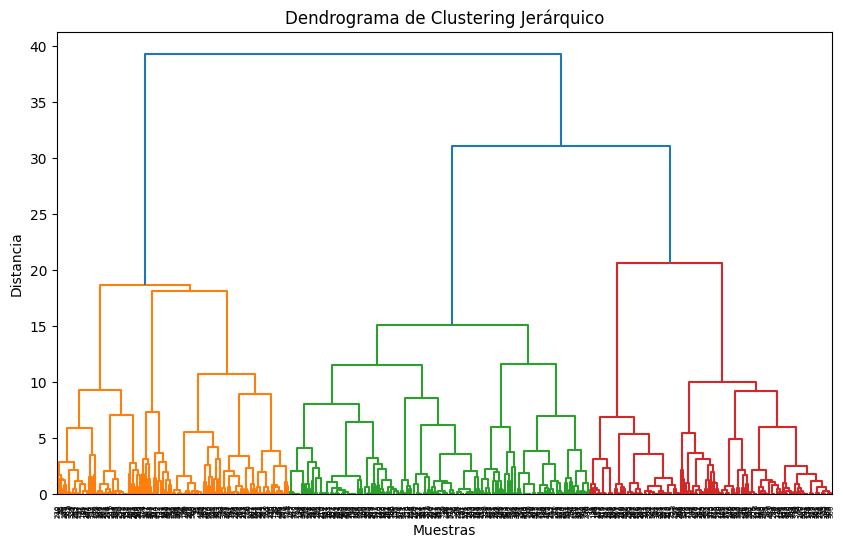

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_excel('/content/drive/My Drive/Tps Ciencia de Datos/TPI/Base de datos/Destinatarios_solo_1.xlsx', sheet_name='Sheet1')
df_numericas = df.select_dtypes(include=[np.number])
scaler = StandardScaler()
df_Z = scaler.fit_transform(df_numericas)


Z = linkage(df_Z, method='ward')

# Dibujar el dendrograma
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Dendrograma de Clustering Jerárquico')
plt.xlabel('Muestras')
plt.ylabel('Distancia')

plt.show()


#Cluster KMeans


In [ ]:
#importamos pandas
import pandas as pd
drive.mount('/content/drive')
data = pd.read_excel("/content/drive/My Drive/Tps Ciencia de Datos/TPI/Base de datos/Destinatarios_solo_1.xlsx", sheet_name='Sheet1')
data.describe()
data.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   EstadoCivil      576 non-null    object
 1   IngresoAnual     576 non-null    int64 
 2   TotalHijos       576 non-null    int64 
 3   Educacion        576 non-null    object
 4   Ocupacion        576 non-null    object
 5   Propietario      576 non-null    int64 
 6   CantAutomoviles  576 non-null    int64 
 7   Distancia        576 non-null    object
 8   Region           576 non-null    object
 9   Edad             576 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 45.1+ KB


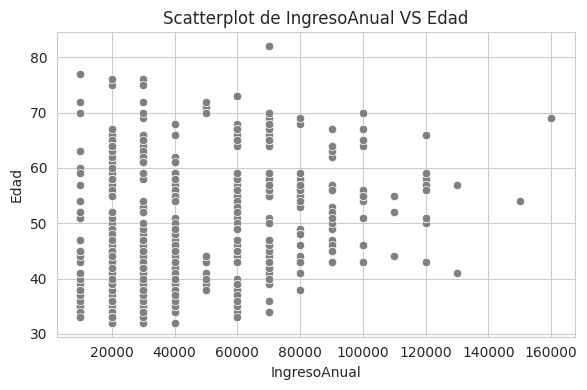

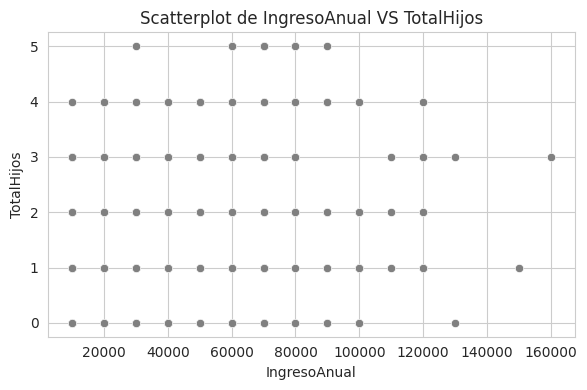

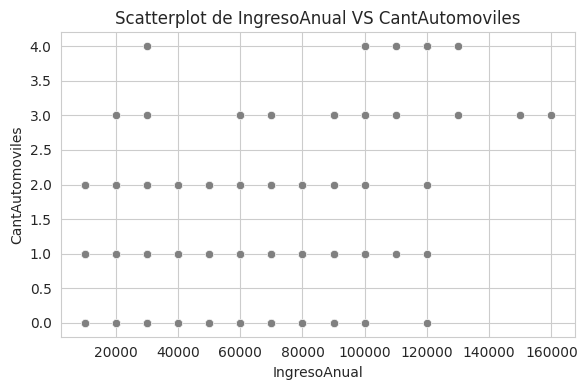

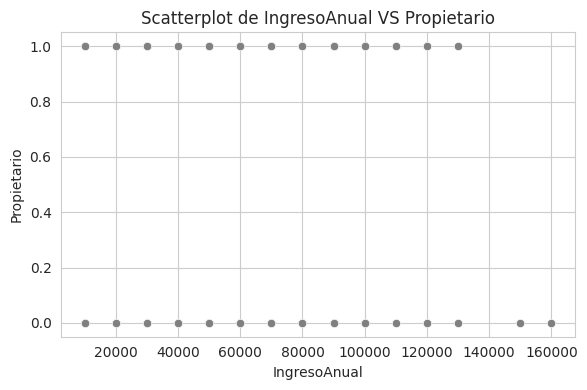

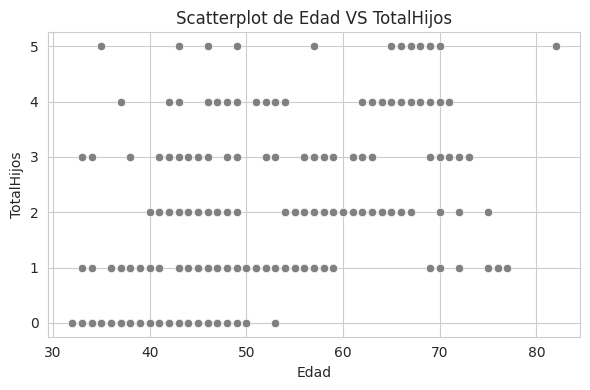

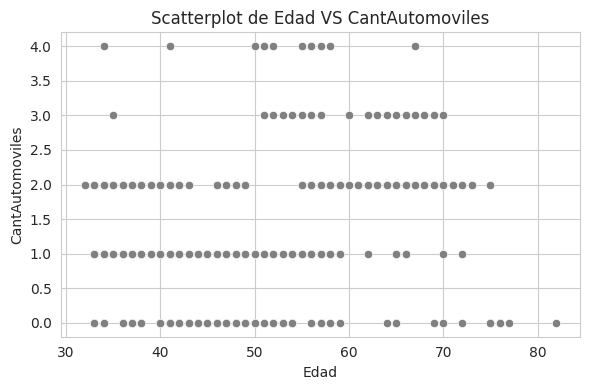

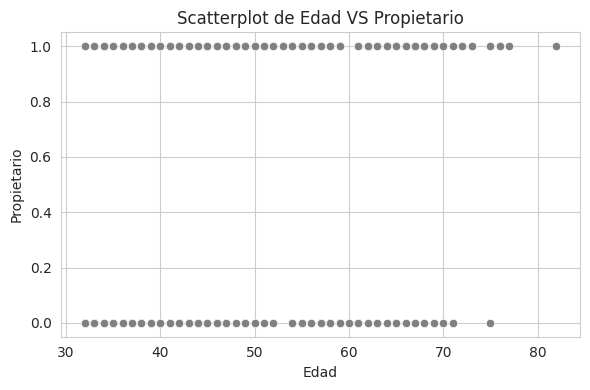

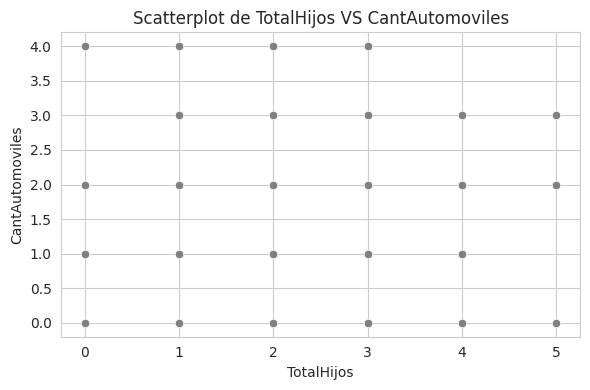

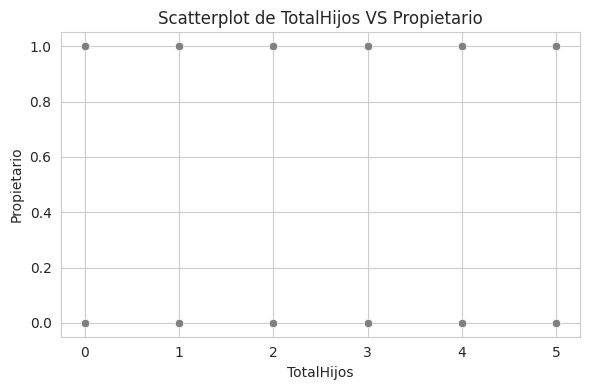

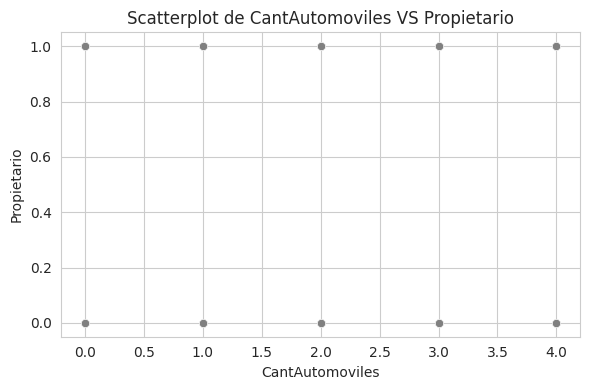

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

# Cargar los datos
data = pd.read_excel("/content/drive/My Drive/Tps Ciencia de Datos/TPI/Base de datos/Destinatarios_solo_1.xlsx", sheet_name='Sheet1')

# Variables numéricas
numeric_cols = ["IngresoAnual", "Edad", "TotalHijos", "CantAutomoviles", "Propietario"]
cols = ["IngresoAnual", "Edad", "TotalHijos", "CantAutomoviles", "Propietario","Region","Educacion","EstadoCivil"] # lo hice para ver si entre categoricas y numericas mejoraba la casa, pero no

# Estilo
sns.set_style("whitegrid")

# Generar scatterplots para todos los pares posibles
for x_var, y_var in combinations(numeric_cols, 2):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=data, x=x_var, y=y_var, color="grey")
    plt.title(f"Scatterplot de {x_var} VS {y_var}")
    plt.tight_layout()
    #plt.ticklabel_format(style='plain', axis='both')
    plt.show()


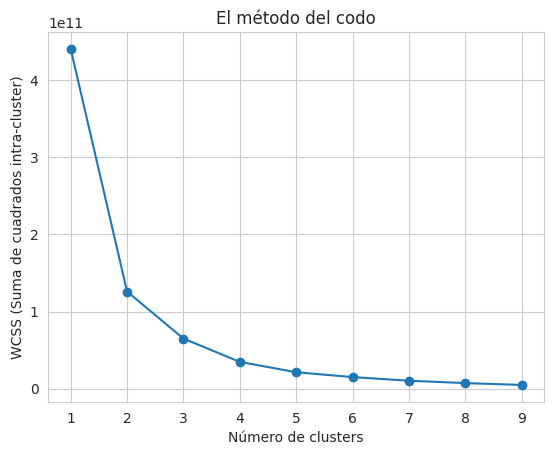

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Cargar los datos
data = pd.read_excel("/content/drive/My Drive/Tps Ciencia de Datos/TPI/Base de datos/Destinatarios_solo_1.xlsx", sheet_name='Sheet1')

# Filtramos solo las columnas numéricas necesarias
numeric_cols = ["IngresoAnual", "Edad", "TotalHijos", "CantAutomoviles", "Propietario"]
data_numericas = data[numeric_cols]

# Aplicamos método del codo
wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=0)
    kmeans.fit(data_numericas)
    wcss.append(kmeans.inertia_)

# Graficamos
plt.plot(range(1, 10), wcss, marker='o')
plt.title('El método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS (Suma de cuadrados intra-cluster)')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.cluster import KMeans


# Elegimos el número de clusters
num_clusters = 3

# Creamos el modelo KMeans
kmeans = KMeans(n_clusters=num_clusters)

# Entrenamos el modelo con los datos
kmeans.fit(data_numericas)

# Obtenemos las etiquetas de los clusters para cada punto de datos
etiquetas = kmeans.labels_

# Obtenemos los centroides de los clusters
centroides = kmeans.cluster_centers_

# Añadimos las etiquetas de los clusters a los datos
data_numericas["Etiqueta"] = etiquetas

# Mostramos los datos con las etiquetas de los clusters
data_numericas.head()


/tmp/ipython-input-6-559426403.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_numericas["Etiqueta"] = etiquetas


,IngresoAnual,Edad,TotalHijos,CantAutomoviles,Propietario,Etiqueta
0,10000,43,1,2,0,1
1,30000,75,1,0,1,2
2,20000,65,4,2,1,1
3,20000,33,0,2,1,1
4,10000,70,3,1,1,1


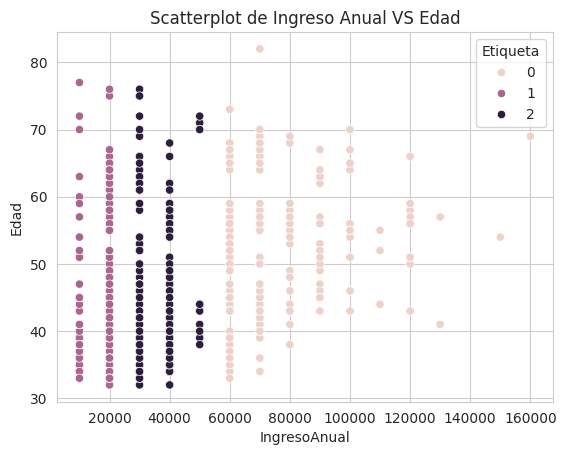

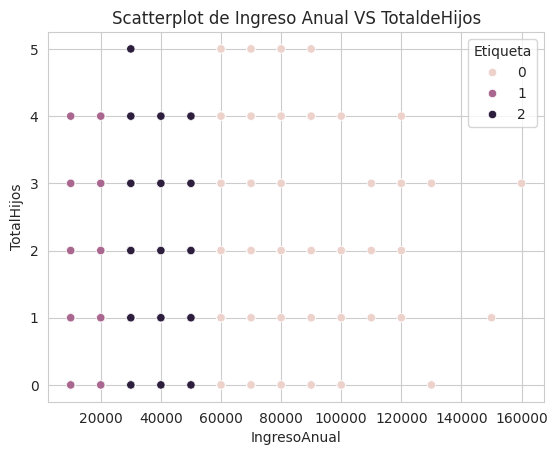

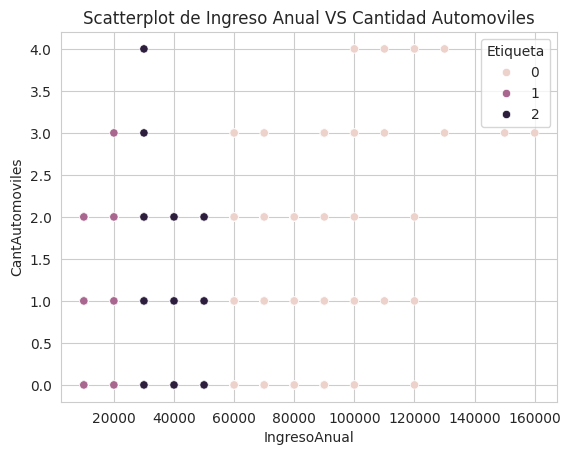

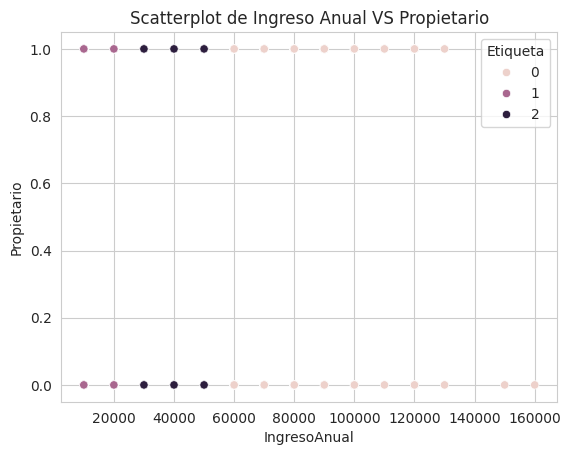

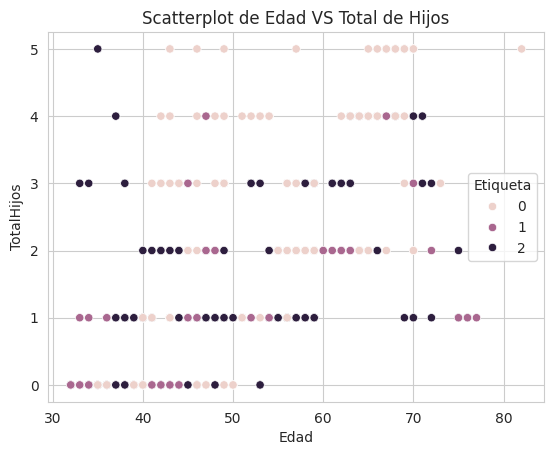

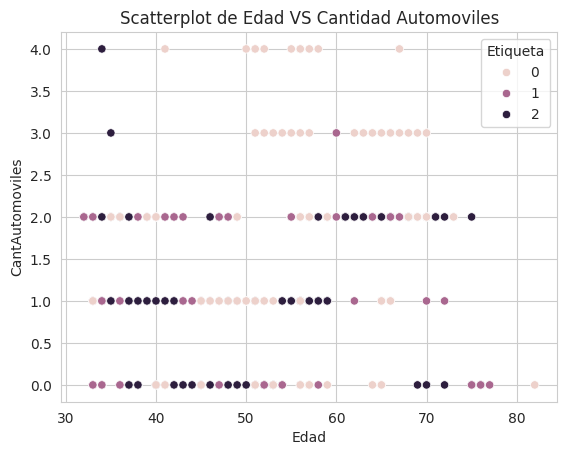

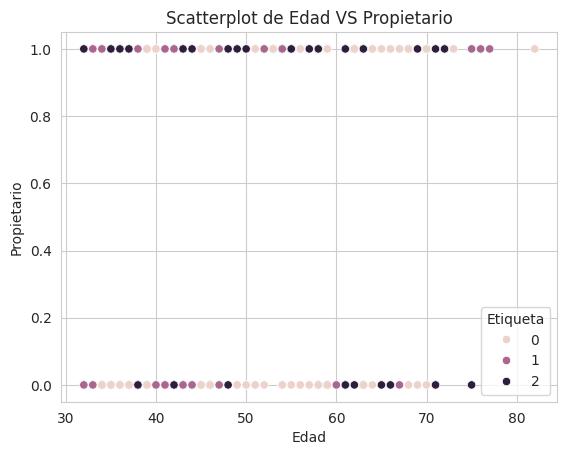

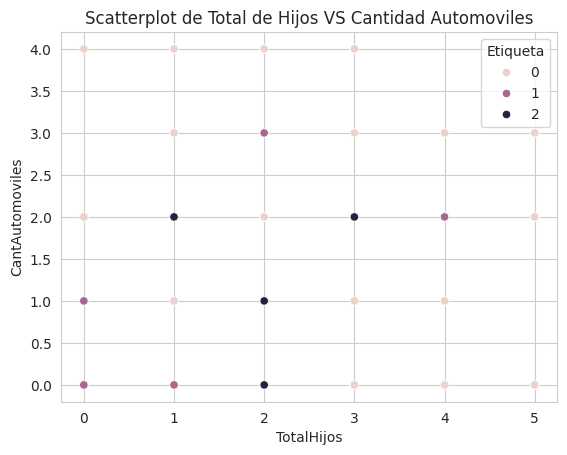

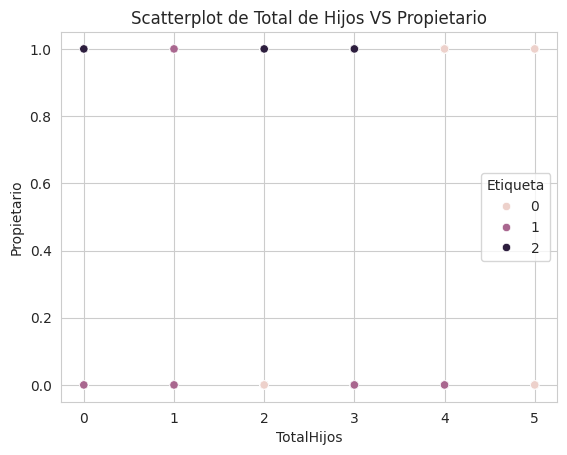

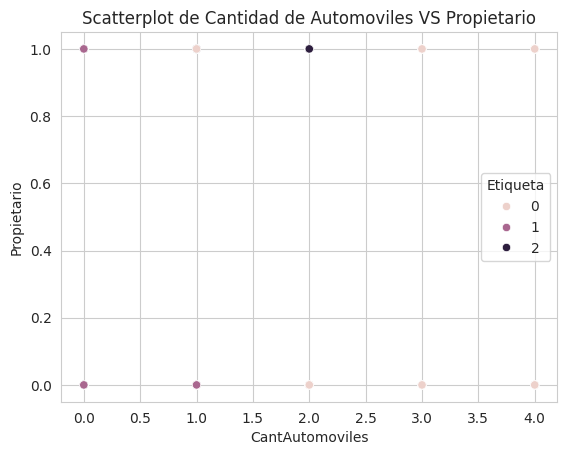

In [ ]:
# Scatterplot de Ingreso Anual vs Edad
sns.scatterplot(data=data_numericas, x="IngresoAnual", y="Edad", hue="Etiqueta")
plt.title("Scatterplot de Ingreso Anual VS Edad")
plt.show()

# Scatterplot de Ingreso Anual vs Total de Hijos
sns.scatterplot(data=data_numericas, x="IngresoAnual", y="TotalHijos", hue="Etiqueta")
plt.title("Scatterplot de Ingreso Anual VS TotaldeHijos")
plt.show()

# Scatterplot de Ingreso Anual vs Cantidad Automoviles
sns.scatterplot(data=data_numericas, x="IngresoAnual", y="CantAutomoviles", hue="Etiqueta")
plt.title("Scatterplot de Ingreso Anual VS Cantidad Automoviles")
plt.show()

# Scatterplot de Ingreso Anual vs Propietario
sns.scatterplot(data=data_numericas, x="IngresoAnual", y="Propietario", hue="Etiqueta")
plt.title("Scatterplot de Ingreso Anual VS Propietario")
plt.show()

# Scatterplot de Edad vs Total Hijos
sns.scatterplot(data=data_numericas, x="Edad", y="TotalHijos", hue="Etiqueta")
plt.title("Scatterplot de Edad VS Total de Hijos")
plt.show()

# Scatterplot de Edad vs Cantidad Automoviles
sns.scatterplot(data=data_numericas, x="Edad", y="CantAutomoviles", hue="Etiqueta")
plt.title("Scatterplot de Edad VS Cantidad Automoviles")
plt.show()

# Scatterplot de Edad vs Cantidad Automoviles
sns.scatterplot(data=data_numericas, x="Edad", y="Propietario", hue="Etiqueta")
plt.title("Scatterplot de Edad VS Propietario")
plt.show()

# Scatterplot de Total de Hijos vs Cantidad Automoviles
sns.scatterplot(data=data_numericas, x="TotalHijos", y="CantAutomoviles", hue="Etiqueta")
plt.title("Scatterplot de Total de Hijos VS Cantidad Automoviles")
plt.show()

# Scatterplot de Total de Hijos vs Propietario
sns.scatterplot(data=data_numericas, x="TotalHijos", y="Propietario", hue="Etiqueta")
plt.title("Scatterplot de Total de Hijos VS Propietario")
plt.show()

# Scatterplot de Cantidad de Automoviles vs Propietario
sns.scatterplot(data=data_numericas, x="CantAutomoviles", y="Propietario", hue="Etiqueta")
plt.title("Scatterplot de Cantidad de Automoviles VS Propietario")
plt.show()

ESTO LO AGREGUÉ RECIEN YO (LULI) PARA VER SI SE PUEDE HACER LO QUE QUIRE LA PROFE, PERO TIENE EL PROBLEMA DE LO QUE LES DIGO POR EL GRUPO DE QUE ME INVIERTE LOS COLORES

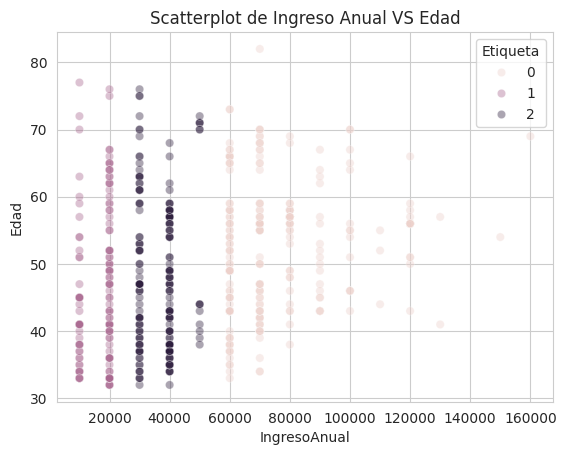

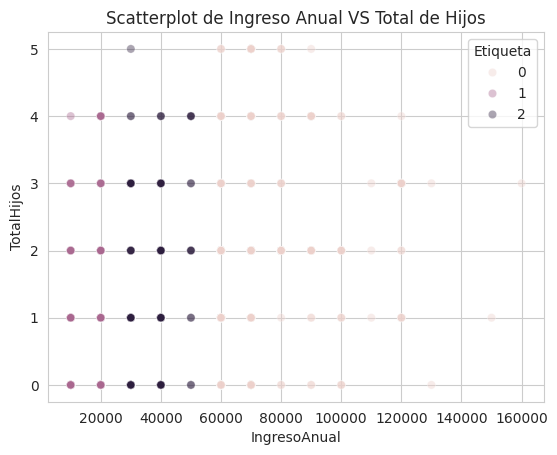

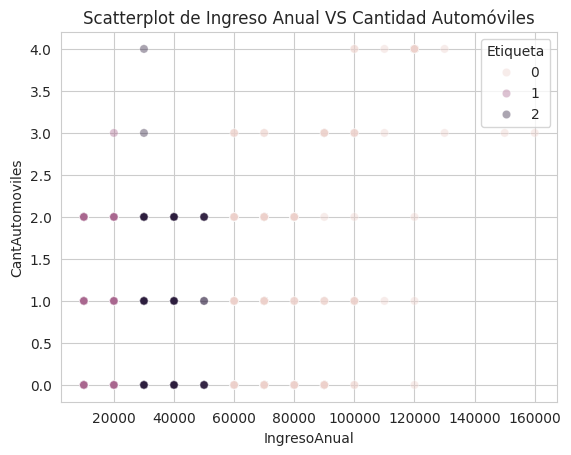

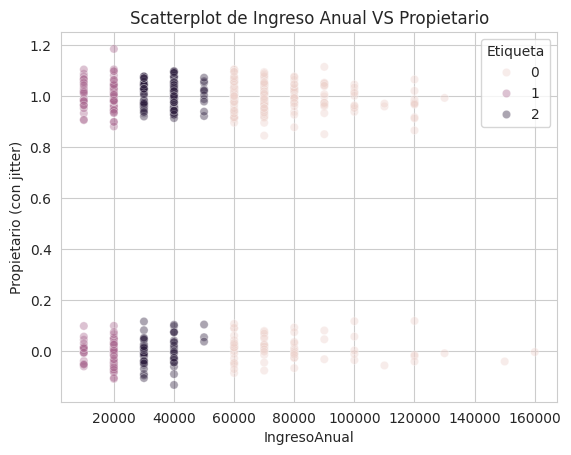

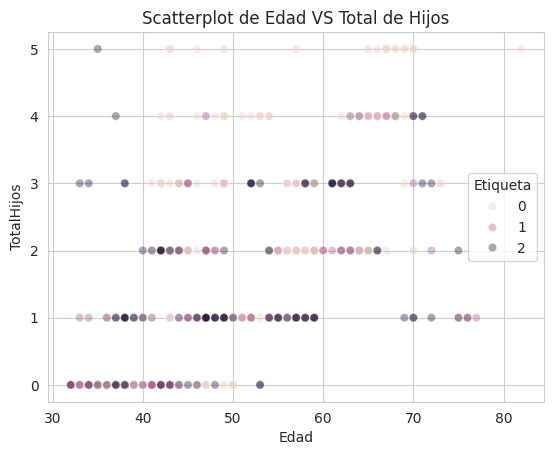

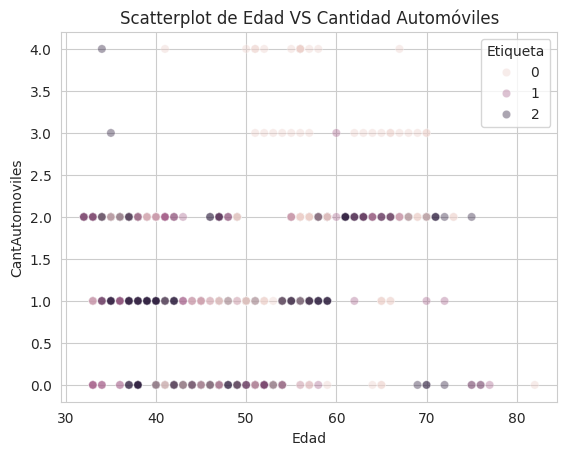

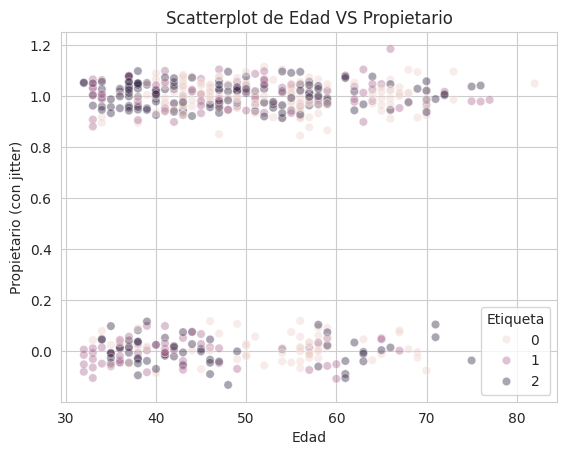

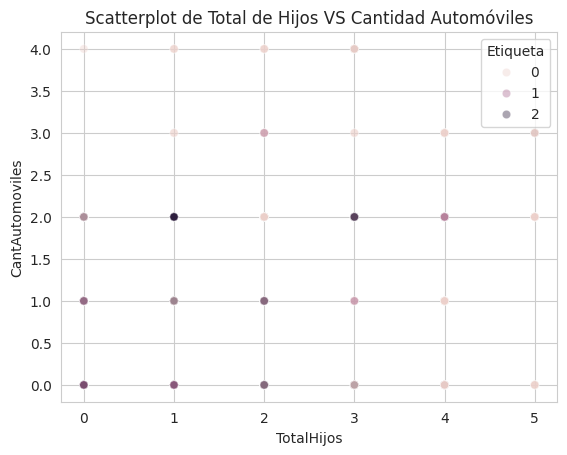

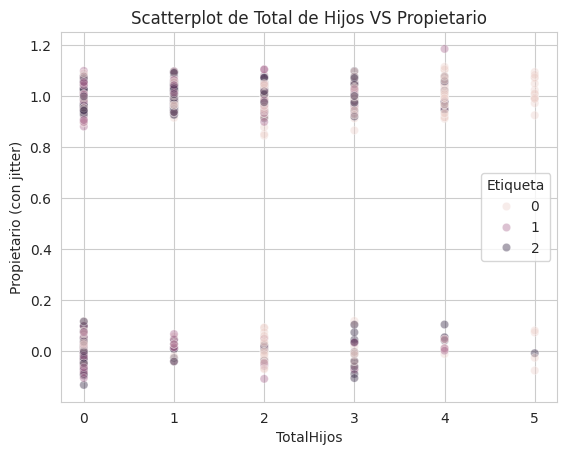

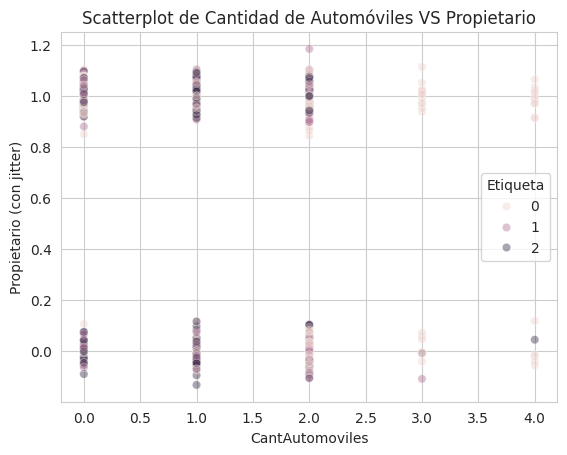

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Evita superposición en variables con pocos valores (como Propietario)
data_numericas = data_numericas.copy()
data_numericas["Propietario_jitter"] = data_numericas["Propietario"] + np.random.normal(0, 0.05, size=len(data_numericas))

# Scatterplots con alpha=0.4 para ver superposición
sns.scatterplot(data=data_numericas, x="IngresoAnual", y="Edad", hue="Etiqueta", alpha=0.4)
plt.title("Scatterplot de Ingreso Anual VS Edad")
plt.show()

sns.scatterplot(data=data_numericas, x="IngresoAnual", y="TotalHijos", hue="Etiqueta", alpha=0.4)
plt.title("Scatterplot de Ingreso Anual VS Total de Hijos")
plt.show()

sns.scatterplot(data=data_numericas, x="IngresoAnual", y="CantAutomoviles", hue="Etiqueta", alpha=0.4)
plt.title("Scatterplot de Ingreso Anual VS Cantidad Automóviles")
plt.show()

sns.scatterplot(data=data_numericas, x="IngresoAnual", y="Propietario_jitter", hue="Etiqueta", alpha=0.4)
plt.title("Scatterplot de Ingreso Anual VS Propietario")
plt.ylabel("Propietario (con jitter)")
plt.show()

sns.scatterplot(data=data_numericas, x="Edad", y="TotalHijos", hue="Etiqueta", alpha=0.4)
plt.title("Scatterplot de Edad VS Total de Hijos")
plt.show()

sns.scatterplot(data=data_numericas, x="Edad", y="CantAutomoviles", hue="Etiqueta", alpha=0.4)
plt.title("Scatterplot de Edad VS Cantidad Automóviles")
plt.show()

sns.scatterplot(data=data_numericas, x="Edad", y="Propietario_jitter", hue="Etiqueta", alpha=0.4)
plt.title("Scatterplot de Edad VS Propietario")
plt.ylabel("Propietario (con jitter)")
plt.show()

sns.scatterplot(data=data_numericas, x="TotalHijos", y="CantAutomoviles", hue="Etiqueta", alpha=0.4)
plt.title("Scatterplot de Total de Hijos VS Cantidad Automóviles")
plt.show()

sns.scatterplot(data=data_numericas, x="TotalHijos", y="Propietario_jitter", hue="Etiqueta", alpha=0.4)
plt.title("Scatterplot de Total de Hijos VS Propietario")
plt.ylabel("Propietario (con jitter)")
plt.show()

sns.scatterplot(data=data_numericas, x="CantAutomoviles", y="Propietario_jitter", hue="Etiqueta", alpha=0.4)
plt.title("Scatterplot de Cantidad de Automóviles VS Propietario")
plt.ylabel("Propietario (con jitter)")
plt.show()


In [ ]:
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

labels_h = fcluster(Z, t=3, criterion='maxclust')
sil_h = silhouette_score(df_Z, labels_h)
print(f"Silhouette Hierárquico (k=3): {sil_h:.3f}")

# 2. Silueta para K‑Means (k=3)
# ------------------------------------------------
'''kmeans = KMeans(n_clusters=3, random_state=17)
labels_k = kmeans.fit_predict(df_Z)
sil_k = silhouette_score(df_Z, labels_k)
print(f"Silhouette K‑Means    (k=3): {sil_k:.3f}")'''

# 3. Gráfico comparativo
# ------------------------------------------------
plt.figure(figsize=(6, 4))
plt.bar(['Jerárquico'], [sil_h])
plt.ylabel('Coeficiente de Silueta')
plt.title('Silueta Jerárquico')
plt.show()

NameError: name 'Z' is not defined

In [ ]:
import pandas as pd
from google.colab import files

df_final = pd.DataFrame({
    "Email": df_destinatarios["Email"],
    "IngresoAnual": df_destinatarios["IngresoAnual"],
    "Edad": df_destinatarios["Edad"],
    "TotalHijos": df_destinatarios["TotalHijos"],
    "CantAutomoviles": df_destinatarios["CantAutomoviles"],
    "Propietario": df_destinatarios["Propietario"],
    "Etiqueta": labels
})

# 2. Mapea cada etiqueta de KMeans a un tipo de bicicleta
tipo_map = {
    2: "Kinder",
    1: "Sport",
    0: "Basic"
}

df_final["tipo_bicicleta"] = df_final["Etiqueta"].map(tipo_map)

# 3. Guarda el nuevo archivo Excel
archivo_destino = "Destinatarios_con_tipo_bicicleta.xlsx"
df_final.to_excel(archivo_destino, index=False)

# 4. Descarga automática desde Colab
files.download(archivo_destino)